## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

# Solution #

## Imports ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from tabulate import tabulate as tb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow_addons.metrics import RSquare
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

c:\Users\Dotev\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Dotev\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you wa

## 1. Analysis: Frame the problem and look at the big picture ##

### 1. Finding a Problem/Task: ###
- The problem revolves around predicting the box office revenue of movies before theyare released. This task intrigued us because it merges business relevance (forecastingfinancial performance) with interesting data points (genre, cast, director, productionbudget, etc.), making it engaging and practical.
### 2. Define the Objective in Business Terms: ###
- The objective is to create a model that predicts a movie's box office revenue prior to itsrelease, enabling stakeholders (e.g., studios, investors, or distributors) to:
    - Estimate ROI: Determine whether a film is likely to be profitable.
    - Allocate Resources: Optimize marketing budgets or production decisions.
    - Risk Management: Identify high-risk projects based on predicted outcomes.
### 3. Framing the Problem ###
- Type of Problem: Supervised Regression Problem because the task involves predicting acontinuous target variable (box office revenue) based on labeled input data (e.g.,budget, cast, genres).
- Possible Input Variables (Features): Budget, Runtime, Genre, Cast and Directorinformation, Keywords, Production Company, Release Date
- Target Variable: Revenue (numerical)
- Key Preprocessing Milestones:
    - Handle missing values (e.g., some movies may not have budget or revenue data).
    - Normalize or scale features like budget and runtime to standardize inputs.
    - One-hot encode categorical variables such as genre and production company.
    - Engineer additional features (e.g., calculate the time of year for the release date).
### 4. How Should Performance Be Measured? ###
- Root Mean Squared Error (RMSE): Measures the average magnitude of prediction errors. Lower RMSE indicates better performance.
- R² Score: Measures the proportion of variance explained by the model. Higher values (closer to 1) indicate a good fit.
- Baseline Model: Use the median or mean revenue of all movies as a naive predictor to benchmark model performance.

## 2. Get the data ##
### 1. Find and Document Where You Can Get the Data From ###
- The dataset for predicting movie revenue comes from Kaggle. It contains detailed metadata on movies, including their financial and - production-related information.
- Dataset Name: The Movies Dataset
- Source: Kaggle
- Link: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
- Description: A collection of metadata for over 45,000 movies. It includes attributes like genres, budgets, revenues, cast, crew, production companies, release dates and keywords.
- File Formats: CSV files containing structured tabular data.

### 2. Get and check data ###

In [2]:
# Load the data, and set low_memory=False to avoid warning
movies = pd.read_csv('Movie_dataset/movies_metadata.csv', low_memory=False)
credits = pd.read_csv('Movie_dataset/credits.csv', low_memory=False)
keywords = pd.read_csv('Movie_dataset/keywords.csv', low_memory=False)
movies_info = {
"shape": movies.shape,
"columns": [(col, str(movies[col].dtype)) for col in movies.columns],
"head": movies.head()
}
credits_info = {
"shape": credits.shape,
"columns": [(col, str(credits[col].dtype)) for col in credits.columns],
"head": credits.head()
}

keywords_info = {
"shape": keywords. shape,
"columns": [(col, str(keywords[col].dtype)) for col in keywords.columns],
"head": keywords.head()
}

print(f"""Shape of movie dataset: {movies_info['shape' ]}

{tb(movies_info['columns'], headers=['Columns', 'Data Type' ])}

Head
{tb(movies_info['head' ], headers="keys", tablefmt="pretty")}

Shape of credits dataset: {credits_info['shape' ]}

{tb(credits_info['columns'], headers=['Columns' , 'Data Type' ])}

Head
{tb(credits_info['head'], headers="keys", tablefmt="pretty")}

Shape of keywords dataset: {keywords_info['shape' ]}

{tb(keywords_info['columns'], headers=['Columns', 'Data Type' ])}

Head
{tb(keywords_info['head' ], headers="keys", tablefmt="pretty" ) }""")

Shape of movie dataset: (45466, 24)

Columns                Data Type
---------------------  -----------
adult                  object
belongs_to_collection  object
budget                 object
genres                 object
homepage               object
id                     object
imdb_id                object
original_language      object
original_title         object
overview               object
popularity             object
poster_path            object
production_companies   object
production_countries   object
release_date           object
revenue                float64
runtime                float64
spoken_languages       object
status                 object
tagline                object
title                  object
video                  object
vote_average           float64
vote_count             float64

Head
+---+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------

From first look we can see that we mainly have numerical and categorical data. We have alsorelease_date which is a date column. There is some description of the movies, keywords, etcwhich is in plain text. We can see that the datasets are not the same size which we have toexplore further and undestand why.

## 3. Explore the data ##
### 1. Merging the datasets ###
Before we explore the data we would merge the datasets. For this we will use the id of the movies for primary key as all datasets contain it and will merge based on it.

First step would be to change the movies dataset id data type because now it is an object. We will start by exploring if there are some text which is not a digit.

In [3]:
def check_non_digits(data, column):
    invalid_records = data[~data[column].str.isdigit()]
    return invalid_records

check_non_digits(movies, 'id')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that these 3 records have wrongly inserted data. As we can see last rows are missing data and seems like "release_date" and "id" could be swapped but it does not matter because we will drop them as the target value "revenue" is missing.

In [4]:
movies = movies[movies['id'].str.isdigit()]
movies['id'] = movies['id'].astype(int)

So now the "id" column is okay and we can proceed with merging.

In [5]:
movies_credits_merge = pd.merge(movies, credits, on="id", how="inner")
merged_movies = pd.merge(movies_credits_merge, keywords, on="id", how="inner")
# Create a copy of the merged dataframe
merged_movies_org = merged_movies.copy()
merged_movies_info = {
"shape": merged_movies.shape,
"columns": merged_movies.columns.tolist(),
"head": merged_movies.head()
}

### 2. Initial decisions on keeping / dropping records and some data exploration ###

In [6]:
# Function for checking missing values, showing data types and unique values
def feature_summary(data):
    def unique_values(x):
        if isinstance(x.iloc[0], list):
            return len(set(tuple(i) for i in x))
        elif isinstance(x.iloc[0], dict):
            return len(set(frozenset(i.items()) for i in x))
        else:
            return x.nunique()
    
    summary = pd.DataFrame({
        "Data Type": data.dtypes.apply(lambda x: 'list' if isinstance(data.iloc[0], list) else ('dict' if isinstance(data.iloc[0], dict) else x)),
        "Missing Values (%)": data.isnull().mean() * 100,
        "Unique Values": data.apply(unique_values)
    })
    return summary

feature_summary(merged_movies)

,Data Type,Missing Values (%),Unique Values
adult,object,0.000000,2
belongs_to_collection,object,90.190444,1695
budget,object,0.000000,1223
genres,object,0.000000,4066
homepage,object,82.823625,7670
id,int32,0.000000,45432
imdb_id,object,0.036459,45415
original_language,object,0.023591,89
original_title,object,0.000000,43370
overview,object,2.133911,44305


The main data type is object. We saw before that there are columns containing json format records of fx genres, cast members, etc. As we saw before there are columns like id which should contain numebers but are object because of wrong entries. We will explore and correct further the columns.

We can see that the columns "belongs_to_collection", "homepage" and "tagline" contain above 50% of missing values. With this amount of missing values the columns won't be useful for predictions. From the display of the first 5 columns of the movie data above we saw that budget is 0 on some of the movies. We should see further for records that have 0 or empty string values instead of NaN.

There are some missing values in "revenues" column which means we could drop the rows as this is the target value we need.

There are columns with small amount of unique values and others like genres containing json format records with categories which should be handled.

For now we will drop columns with high amount of missing values and all the rows with missing revenue.

But before we start dropping anything we will check how much of the movies have a revenue of 0 because we noticed that above the movie "Grumpier Old Men" has a revenue of 0 which after a check on the internet we see that it is around 71 milion USD, so that means it should be input error, not that the movie did not had any revenue.

In [7]:
def check_0_values(data, column, return_rows=False):
    print(f"Total number of rows: {data.shape[0]}")
    print(f'{column.capitalize()} which are 0: {data[data[column] == 0].shape[0]}')
    print(f'Percentage of {column} which are 0: {data[data[column] == 0].shape[0] / data.shape[0] * 100:.2f}%')
    return data[data[column] == 0] if return_rows else None

check_0_values(merged_movies, 'revenue')

Total number of rows: 46628
Revenue which are 0: 39087
Percentage of revenue which are 0: 83.83%


It seems like a big part of our dataset is missing the target value (revenue) which is more than 83%. We still have more than 7000 rows of data which should be enough. So now we will drop the rows with revenue 0 and see what are the percentages of missing values.

In [8]:
merged_movies = merged_movies[merged_movies['revenue'] != 0]
check_0_values(merged_movies, 'revenue')
feature_summary(merged_movies)

Total number of rows: 7541
Revenue which are 0: 0
Percentage of revenue which are 0: 0.00%


,Data Type,Missing Values (%),Unique Values
adult,object,0.000000,1
belongs_to_collection,object,80.082217,751
budget,object,0.000000,705
genres,object,0.000000,1522
homepage,object,68.028113,2332
id,int32,0.000000,7401
imdb_id,object,0.000000,7401
original_language,object,0.000000,44
original_title,object,0.000000,7268
overview,object,0.291738,7378


After clearing the revenue values we are left with 7541 records. Now we can proceed with dropping the columns which have a lot of missing values as they do not present any useful information.

In [9]:
# Drop columns with more than 50% missing values
merged_movies = merged_movies.dropna(thresh=0.5*len(merged_movies), axis=1)

# Drop rows with missing revenue values
merged_movies = merged_movies.dropna(subset=["revenue"])

We will focus on correcting the data types and dealing with the columns that contain json format records. The 'id' column won't be used as an index for now as it has duplicated values.

In [10]:
print(f"Duplicated ids: {merged_movies['id'].duplicated().sum()}")

Duplicated ids: 139


In [11]:
print(check_non_digits(merged_movies, 'budget'))

# Fill missing values with 0 before converting to integers
merged_movies['budget'] = merged_movies['budget'].astype(int)
merged_movies['revenue'] = merged_movies['revenue'].astype(int)
merged_movies['runtime'] = merged_movies['runtime'].fillna(-1).astype(int)
merged_movies['vote_count'] = merged_movies['vote_count'].astype(int)
merged_movies['popularity'] = merged_movies['popularity'].astype(float)
merged_movies[['original_language', 'title']] = merged_movies[['original_language', 'title']].astype('string')
merged_movies['release_date'] = pd.to_datetime(merged_movies['release_date'], errors='coerce')

Empty DataFrame
Columns: [adult, budget, genres, id, imdb_id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, video, vote_average, vote_count, cast, crew, keywords]
Index: []

[0 rows x 25 columns]


In [12]:
feature_summary(merged_movies[['budget', 'revenue', 'runtime']])

,Data Type,Missing Values (%),Unique Values
budget,int32,0.0,705
revenue,int32,0.0,6862
runtime,int32,0.0,168


In [13]:
check_0_values(merged_movies, 'budget')

Total number of rows: 7537
Budget which are 0: 2079
Percentage of budget which are 0: 27.58%


We have a lot of records where the budget is 0. We will deal with this later in the analyses. Probably will impute as we do not want to loose more data points and the percentage is less than 30. For now we will keep NaN values of runtime as -1.

So we checked and type casted "budget", "release_date", "revenue" and other columns. We chose int for some of them because it would be more memory efficient and we do not need float for big amounts of money like in the "budget" and "revenue" columns. "runtime" column contains only integer values and because of memory efficiency reasons we casted the column data into int.

### 3. Extracting data from the lists ###

In [14]:
def extract_data(data, column, extract_value='name'):
    data[column] = data[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    data[f'{column}_list'] = data[column].apply(lambda x: [i[extract_value] for i in x])
    return data

# Here we will change the dataset name to data because we will start to add and remove columns
columns_to_extract = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'cast']
for column in columns_to_extract:
    data = extract_data(merged_movies, column)

data.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,vote_count,cast,crew,keywords,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,5415,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,2413,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,34,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English],"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,173,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim..."
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,1886,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],"[English, Español]","[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo..."


In [15]:
def extract_crew_member(data, job='Director'):
    data['crew'] = data['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    data[job.lower()] = data['crew'].apply(lambda x: [i['name'] for i in x if i['job'] == job.capitalize()])
    return data

roles_to_extract = ['Director']
for role in roles_to_extract:
    data = extract_crew_member(data, role)

data[['crew', 'director']].head()

,crew,director
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",[John Lasseter]
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",[Joe Johnston]
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",[Forest Whitaker]
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",[Charles Shyer]
5,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...",[Michael Mann]


It seems like we extracted the most usefull data that will help us with the analyses. Now we will drop the unnecesary columns and continue working.

In [16]:
data = data.drop(['crew', 'cast', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords'], axis=1)
data.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,video,vote_average,vote_count,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list,director
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,...,False,7.7,5415,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,...,False,6.9,2413,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
3,False,16000000,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,...,False,6.1,34,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English],"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,False,0,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,...,False,5.7,173,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]
5,False,60000000,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,1995-12-15,...,False,7.7,1886,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],"[English, Español]","[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann]


In [17]:
feature_summary(data)

,Data Type,Missing Values (%),Unique Values
adult,object,0.000000,1
budget,int32,0.000000,705
id,int32,0.000000,7398
imdb_id,object,0.000000,7398
original_language,string[python],0.000000,44
original_title,object,0.000000,7265
overview,object,0.291893,7375
popularity,float64,0.000000,7401
poster_path,object,0.026536,7396
release_date,datetime64[ns],0.013268,4704


### 4. Dealing with duplicated ids and dropping unnecessary columns ###
So now we will see the duplicated ids and try to resolve them.

In [18]:
def combine_rows_by_id(data, id_column):
    aggregation_rules = {
        col: 'mean' if pd.api.types.is_numeric_dtype(data[col]) else 'first'
        for col in data.columns if col != id_column
    }

    data_int_columns = data.select_dtypes(include=['int']).columns
    
    # Group by ID and apply aggregation rules
    combined_data = data.groupby(id_column, as_index=False).agg(aggregation_rules)
    
    # Convert float columns to integers
    for col in data_int_columns:
        combined_data[col] = combined_data[col].astype(int)
    
    return combined_data

data = combine_rows_by_id(data, 'id')

duplicates = data[data.duplicated(subset='id', keep=False)]
print(f"Number of duplicated values: {duplicates['id'].count().sum()}")

Number of duplicated values: 0


In [19]:
data.set_index('id', inplace=True)
data.index.name = None
data.head()

,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,...,video,vote_average,vote_count,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list,director
5,False,4000000,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,1995-12-09,4300000,...,False,6.5,539,"[Crime, Comedy]","[Miramax Films, A Band Apart]",[United States of America],[English],"[hotel, new year's eve, witch, bet, hotel room...","[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
6,False,0,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.538671,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg,1993-10-15,12136938,...,False,6.4,79,"[Action, Thriller, Crime]","[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",[English],"[chicago, drug dealer, boxing match, escape, o...","[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
11,False,11000000,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg,1977-05-25,775398007,...,False,8.1,6778,"[Adventure, Action, Science Fiction]","[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],[English],"[android, galaxy, hermit, death star, lightsab...","[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]
12,False,94000000,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",25.497794,/syPWyeeqzTQIxjIUaIFI7d0TyEY.jpg,2003-05-30,940335536,...,False,7.6,6292,"[Animation, Family]",[Pixar Animation Studios],[United States of America],[English],"[father son relationship, harbor, underwater, ...","[Albert Brooks, Ellen DeGeneres, Alexander Gou...",[Andrew Stanton]
13,False,55000000,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,48.307194,/yE5d3BUhE8hCnkMUJOo1QDoOGNz.jpg,1994-07-06,677945399,...,False,8.2,8147,"[Comedy, Drama, Romance]",[Paramount Pictures],[United States of America],[English],"[vietnam veteran, hippie, mentally disabled, r...","[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...",[Robert Zemeckis]


Now we have cleared the duplicated ids and assigned the "id" column as index.

In [20]:
feature_summary(data)

,Data Type,Missing Values (%),Unique Values
adult,object,0.000000,1
budget,int32,0.000000,705
imdb_id,object,0.000000,7398
original_language,string[python],0.000000,44
original_title,object,0.000000,7265
overview,object,0.297378,7375
popularity,float64,0.000000,7394
poster_path,object,0.027034,7396
release_date,datetime64[ns],0.013517,4704
revenue,int32,0.000000,6862


From looking at the columns we can see that there are some irrelevant columns for our analyses such as "imbd_id", "vote_average", "vote_count", etc. Here are some reasoning for columns we will exclude for the analyses.

- adult: Indicates whether the movie is "adult content." While it could have minor influence, it is unlikely to directly correlate with revenue.
- imdb_id: This is a unique identifier and has no predictive value.
- popularity: The popularity metric is dynamic and largely influenced by post-release activity.
- original_title: The title of the movie is not directly useful for predicting revenue, unlike related metadata like popularity or genre might.
- overview: This is a textual description, which could be helpful for NLP analysis, but in most cases, it's not directly related to predicting revenue.
- poster_path: A URL to a poster image is not relevant for revenue prediction.
- status: While it might indicate if the movie is released, it may not significantly contribute to predictive modeling.
- vote_count and vote_average: Not relevant because the goal is to predict movie revenue before the movie is released to the cinema.
- video: This column typically indicates if a video is available, which would be irrelevant for prediction.

Before dropping the columns we will save the dataframe if we need some of the columns later in the analyses.

In [21]:
merged_movies_org = data.copy()

data = data.drop(["adult", "imdb_id", "tagline", "original_title", "popularity", "overview", "poster_path", "status", "vote_count", "vote_average", "video"], axis=1)

data.head(2)

,budget,original_language,release_date,revenue,runtime,title,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list,director
5,4000000,en,1995-12-09,4300000,98,Four Rooms,"[Crime, Comedy]","[Miramax Films, A Band Apart]",[United States of America],[English],"[hotel, new year's eve, witch, bet, hotel room...","[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
6,0,en,1993-10-15,12136938,110,Judgment Night,"[Action, Thriller, Crime]","[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",[English],"[chicago, drug dealer, boxing match, escape, o...","[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]


For now we will leave the dataset like this and will do some more visual exploration of it, so we can analyse further possible trends.

### 5. Visualization of data and better understanding ###
Before we start with visualization and polishing the data we will first take a look at the data description to know better what are we dealing with.

In [22]:
# Change the budget and revenue to million dollars
data.rename(columns={'budget': 'budget_million', 'revenue': "revenue_million"}, inplace=True)
data['budget_million'] = (data['budget_million'] / 1e6)
data['revenue_million'] = (data['revenue_million'] / 1e6)

data.describe()

,budget_million,release_date,revenue_million,runtime
count,7398.000000,7397,7398.000000,7398.000000
mean,22.601458,2000-02-28 23:52:47.824793856,68.189494,107.629089
min,0.000000,1915-02-08 00:00:00,-2147.483648,-1.000000
25%,0.000000,1992-11-06 00:00:00,2.400000,94.000000
50%,7.500000,2004-07-23 00:00:00,16.822719,104.000000
75%,28.000000,2011-06-17 00:00:00,67.281212,118.000000
max,380.000000,2017-08-11 00:00:00,2068.223624,338.000000
std,36.948673,NaN,145.353867,21.693255


#### 1. Budget (insights) ####
On average, movies cost around **22.6 million USD**, but the median is **7.5 million USD**. This large difference indicates that the budget data is **right-skewed**, likely due to high-budget blockbusters.

The **maximum budget** is **380 million USD**, which reflects the presence of exceptionally high-budget productions.

The **minimum value** is **0**, suggesting missing or incorrect data. As we know from before we have some 0 values which we have to handle appropriately.

#### 2. Release date (insights) ####
The dataset includes movies released between **1915 and 2017**, covering over a century of film history.

One record is **missing a release date**, which should be addressed during data cleaning.

#### 3. Revenue (insights) ####
The **mean revenue** is **68.8 million USD**, but the **median is only 16.8 million USD**, again indicating right-skewed data caused by blockbuster movies.

The **maximum revenue** is an impressive **2.78 billion USD**, suggesting the presence of highly successful films like global blockbusters.

The **minimum revenue** is **1 USD**, which is almost certainly an error or placeholder value that needs further investigation.

#### 4. Runtime (insights) ####
The **mean runtime** is **107 minutes** (~1 hour and 48 minutes), while the median runtime is **104 minutes**, suggesting a **normal distribution** for this column.

However, the **maximum runtime** is **338 minutes** (~5.5 hours), which is exceptionally long and likely an outlier (e.g., extended director’s cuts or mini-series).

The **minimum runtime** is **-1**, which likely represents missing values (NaN) and must be treated accordingly.

#### **Sum up (insights):** ####
- **Right-Skewed Data:** Both the **budget** and **revenue** columns are right-skewed due to a few extremely high values (blockbusters). Consider transforming or handling outliers for better modeling results.

- **Missing Values:**
    - Budgets with **0** need further investigation.
    - The **-1** in runtime should be replaced or imputed as NaN.
    - One missing release date should be addressed.
    - 
- **Outliers:**
    - **Runtime** has extreme long values (338 minutes), which could affect analyses.

In [23]:
# Defining variable to hold data for exploration purposes
exploration = data.copy()

We will save the train_data for a pipline we will create in the next step. For now we will continue with eploration variable.

#### 1. Runtime ####
First we will start with "runtime" column as it has small amount of missing and 0 values and we can impute easily with simple imputer.

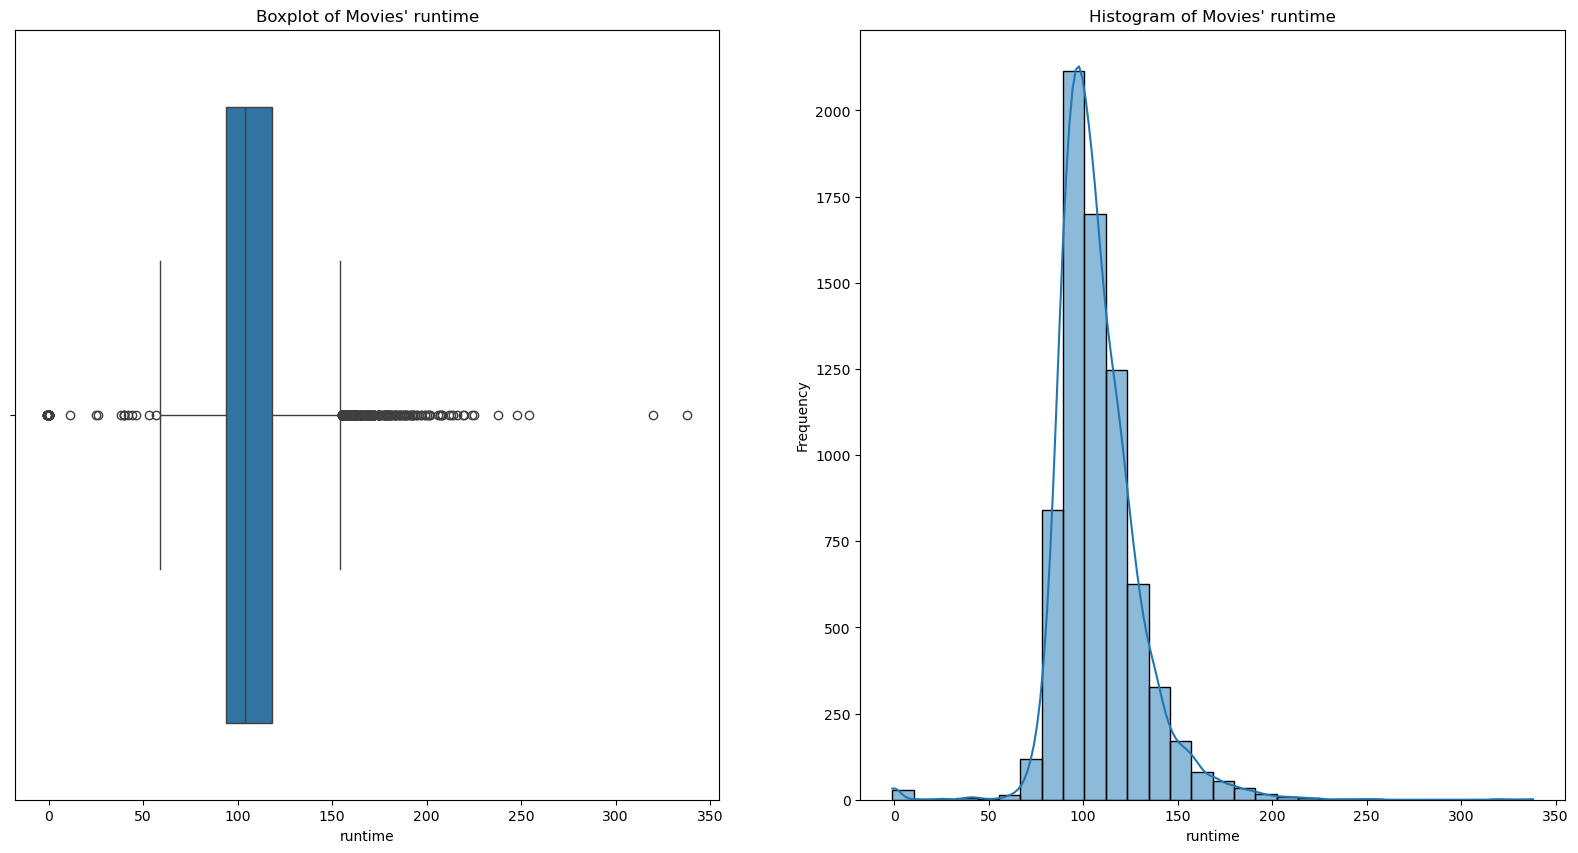

In [24]:
def plot_box_hist(data, column):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    sns.boxplot(x=data[column], ax=ax[0])
    ax[0].set_title(f"Boxplot of Movies' {column}")
    ax[0].set_xlabel(column)

    sns.histplot(data[column], bins=30, kde=True, ax=ax[1])
    ax[1].set_title(f"Histogram of Movies' {column}")
    ax[1].set_xlabel(column)
    ax[1].set_ylabel("Frequency")
    plt.show()


plot_box_hist(exploration, 'runtime')

The boxplot shows several outliers in the runtime of movies, particularly at both the lower and higher ends (e.g., below 50 minutes and above 200 minutes), with a few extreme values nearing 350 minutes. The histogram confirms a somewhat normal distribution, where most movies have runtimes between 90 and 120 minutes, which is typical, while longer runtimes are rare.

In [25]:
check_0_values(exploration, 'runtime')
print(f"Number of rows with runtime as -1: {exploration[exploration['runtime'] == -1].shape[0]}")

Total number of rows: 7398
Runtime which are 0: 21
Percentage of runtime which are 0: 0.28%
Number of rows with runtime as -1: 6


It seems like we have some 0 values for runtime which is not possible for a movie. We checked if it was because of the type cast to int but it seems like it is also present in the original dataset.

We will make all 0 and -1 into NaN value and impute them later in preprocessing using SimpleImpute. We will use median because is more robust to outliers.

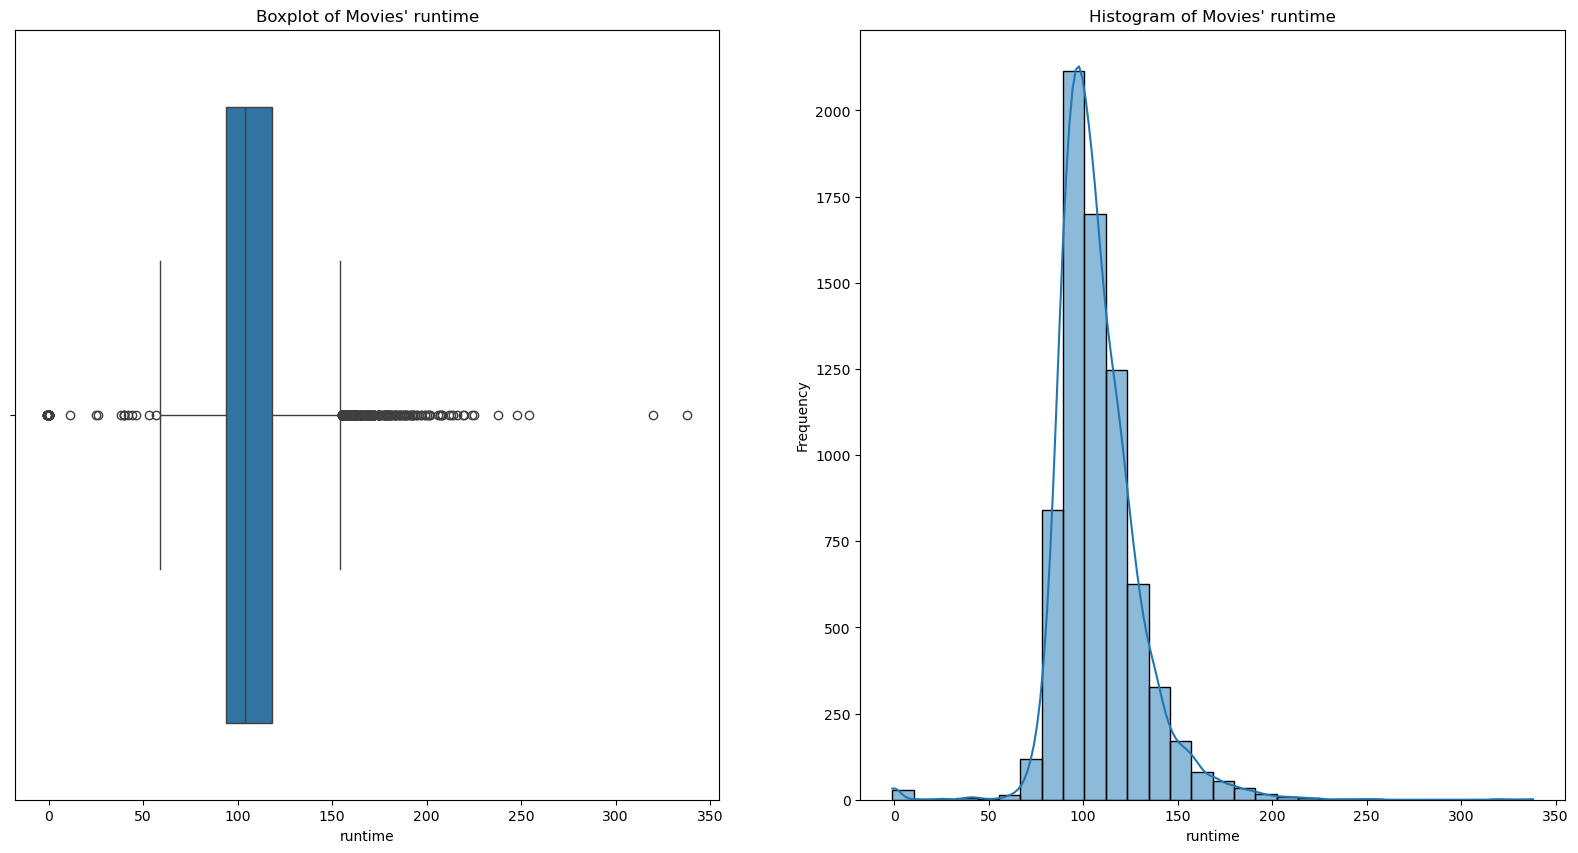

In [26]:
plot_box_hist(exploration, 'runtime')

In [27]:
exploration[exploration['runtime'] > 300]

,budget_million,original_language,release_date,revenue_million,runtime,title,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list,director
43434,18.0,en,2010-05-19,0.871279,338,Carlos,"[Crime, Drama, Thriller, History]","[Egoli Tossell Film AG, Canal+, Arte France, F...","[France, Germany]","[Français, Deutsch, English, Español, العربية,...","[gun, car bomb, miniseries, terrorism, opec, h...","[Edgar Ramírez, Alexander Scheer, Fadi Abi Sam...",[Olivier Assayas]
117691,1.4,hi,2012-06-22,4.100000,320,Gangs of Wasseypur,"[Action, Thriller, Crime]","[Anurag Kashyap Films, Jar Pictures]",[India],[हिन्दी],"[mafia, gang]","[Manoj Bajpayee, Richa Chadda, Tigmanshu Dhuli...",[Anurag Kashyap]


We still have some outliers but that is okay as these are possible values for a movie lenght. We checked the one with runtime 338 and seems like it is a real movie and the runtime is correct.

#### 2. Budget ####
Now we will focus on imputing and visualizing the "budget_million" column.

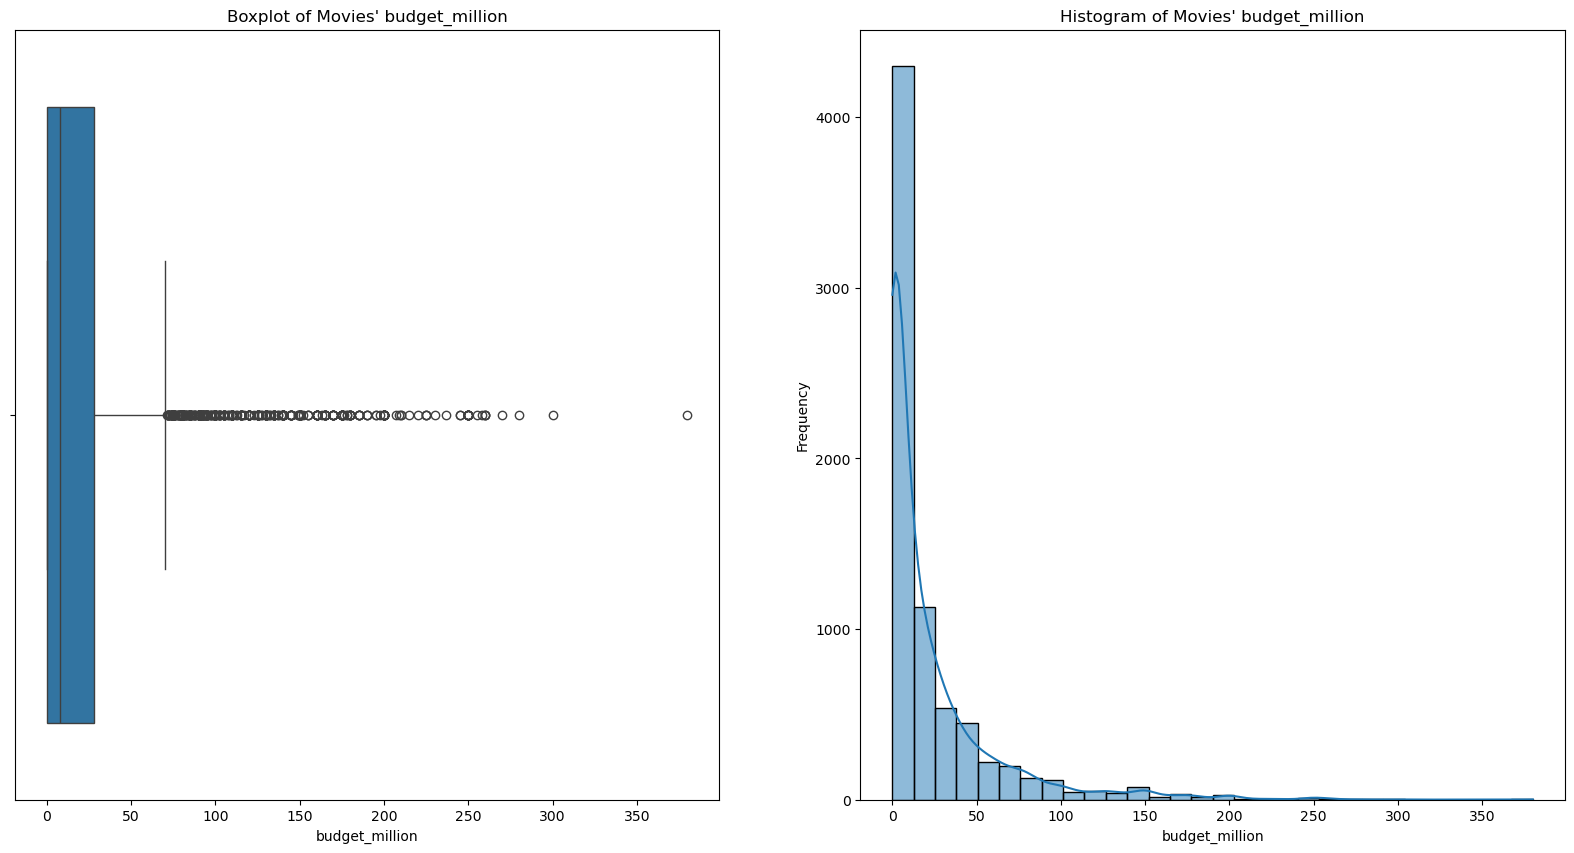

In [28]:
plot_box_hist(exploration, 'budget_million')

It seems like there are a lot of movies which budget is very low. We will do a scatter plot of budget and revenue now.

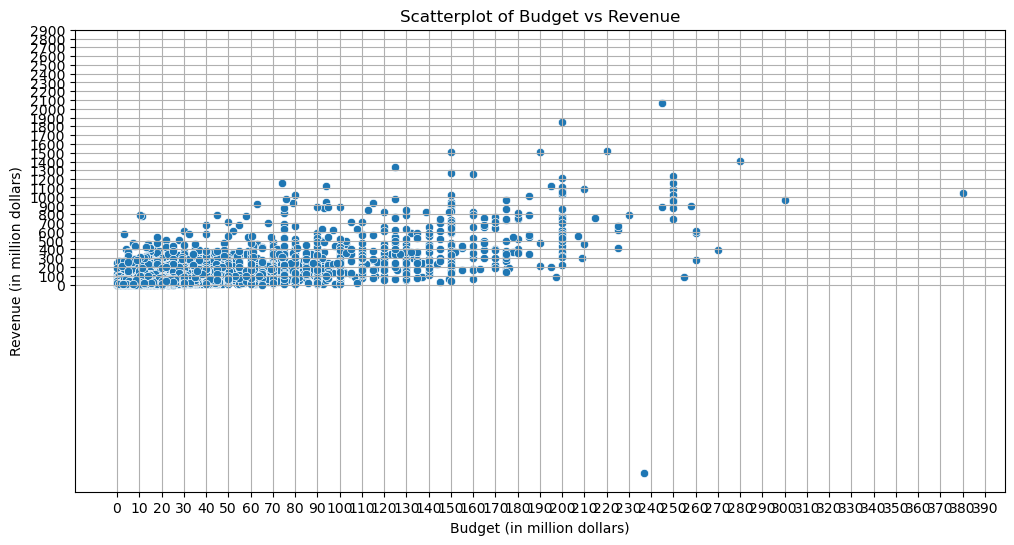

In [29]:
exploration['budget_million'] = exploration['budget_million'].replace(0, np.nan)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=exploration, x='budget_million', y='revenue_million')
plt.title("Scatterplot of Budget vs Revenue")
plt.xlabel("Budget (in million dollars)")
plt.ylabel("Revenue (in million dollars)")
plt.yticks(range(0, 3000, 100))
plt.xticks(range(0, 400, 10))
plt.grid(True)
plt.show()

As we can see there are still records where revenue and budget are very low (near 0). That is probably a mistake with data collection and has to be adjusted. Our decision here is to get a closer look at the small values and decide what to do.

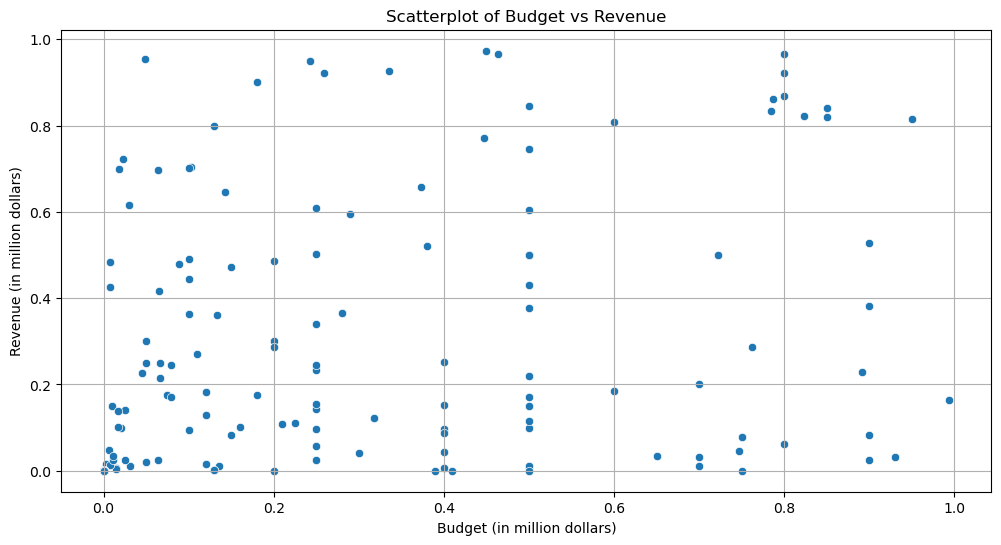

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=exploration[(exploration['budget_million'] < 1) & (exploration['revenue_million'] < 1)], x='budget_million', y='revenue_million')
plt.title("Scatterplot of Budget vs Revenue")
plt.xlabel("Budget (in million dollars)")
plt.ylabel("Revenue (in million dollars)")
plt.grid(True)
plt.show()

In [31]:
check_0_values(exploration, 'budget_million')

Total number of rows: 7398
Budget_million which are 0: 0
Percentage of budget_million which are 0: 0.00%


Based on the scatterplot we decided to drop all records with revenue and budget bellow 200 000 and see what will be the result, because right now this is only noisy data.

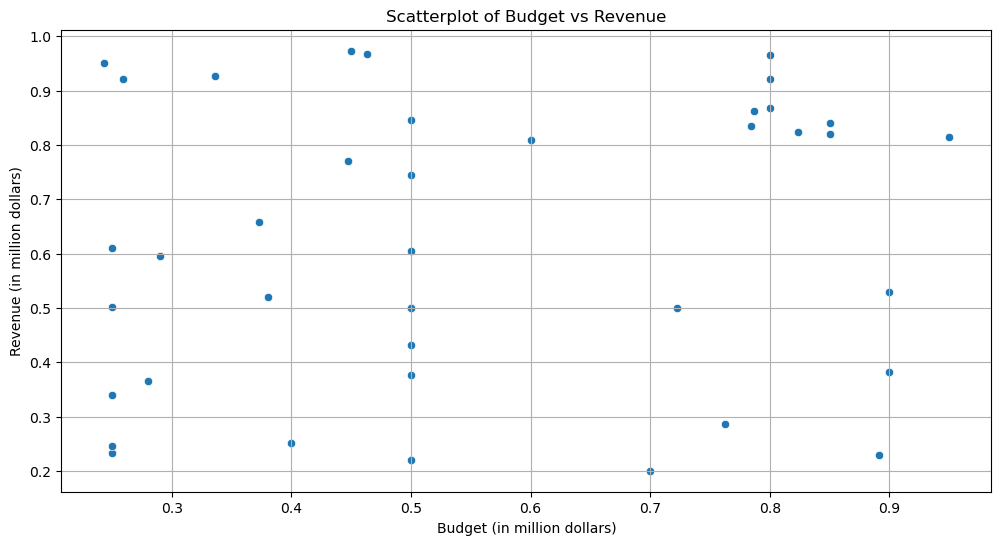

In [32]:
# We get the budget Nan values that should be imputed
exploration_nan = exploration[exploration['budget_million'].isna()]

# Then we drop the rows with budget and revenue less than 0.2 because of revenue can not be imputed
exploration = exploration[(exploration['budget_million'] > 0.2) & (exploration['revenue_million'] > 0.2)]

# Combine again the data
exploration = pd.concat([exploration, exploration_nan])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=exploration[(exploration['budget_million'] < 1) & (exploration['revenue_million'] < 1)], x='budget_million', y='revenue_million')
plt.title("Scatterplot of Budget vs Revenue")
plt.xlabel("Budget (in million dollars)")
plt.ylabel("Revenue (in million dollars)")
plt.grid(True)
plt.show()

It is not the best result but we can plot the data again and see if we have any slight update. If not we will try to log the data.

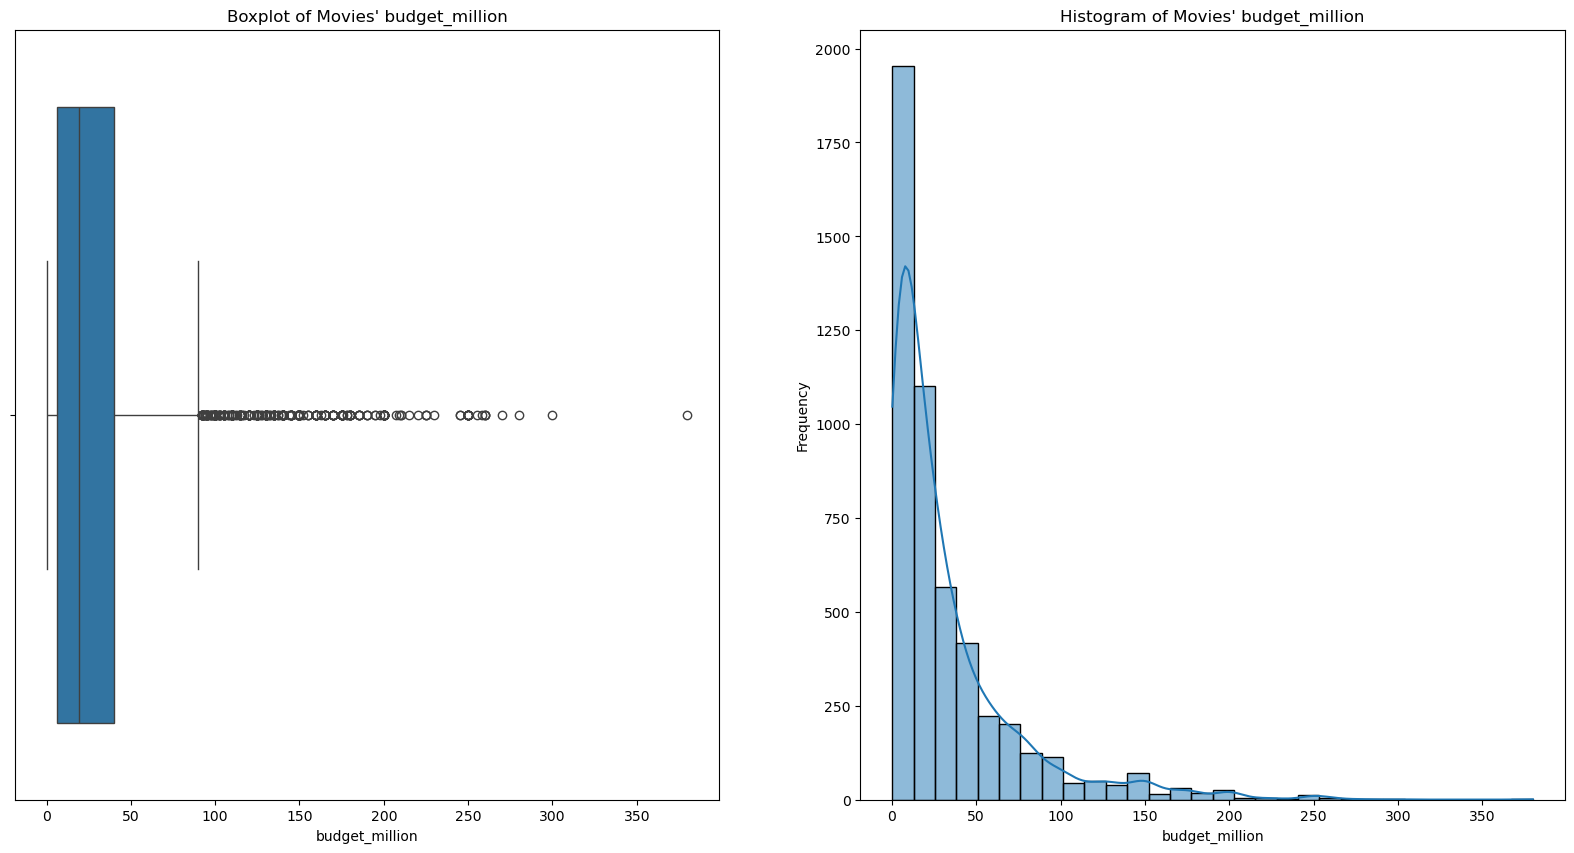

In [33]:
plot_box_hist(exploration, 'budget_million')

Still not that great. We can try here and log the data and see the result.

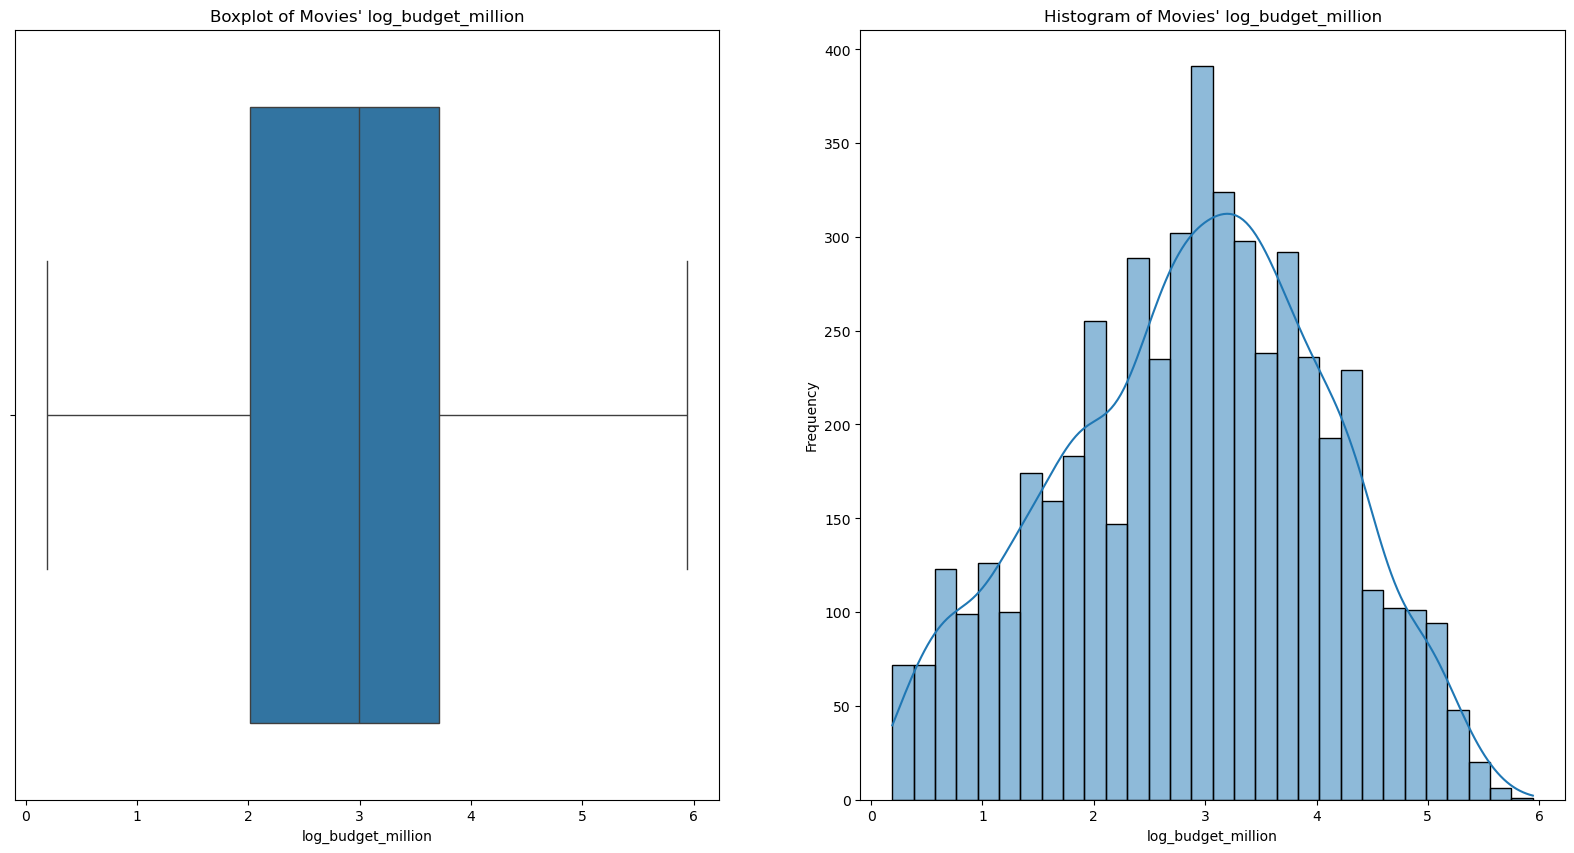

In [34]:
# Log-transform the budget_million column
exploration['log_budget_million'] = np.log1p(exploration['budget_million'])

plot_box_hist(exploration, 'log_budget_million')

Now the distribution seems normalized which can help in later steps when training the model. Because we have some NaN values lets focus on which columns correlate with budget_million and can help us impute it using KNN imputer.

In [35]:
def get_population_vote_count(data1, data2):
    # Get the intersection of the matching indices
    matching_indices = data2.index.intersection(data1.index)

    matching_records = data2.loc[matching_indices]

    return matching_records[['popularity', 'vote_count']].copy()

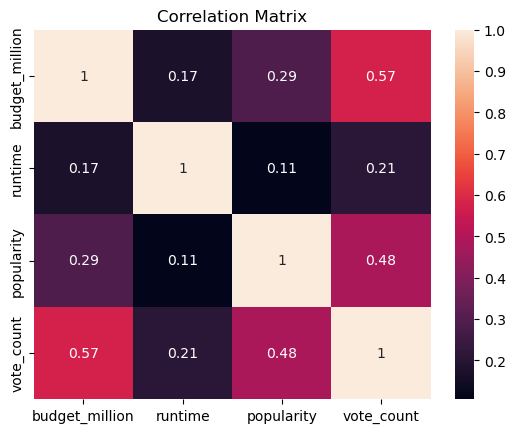

In [36]:
exploration['budget_million'] = exploration['budget_million'].replace(0, np.nan)

pop_vote_data = get_population_vote_count(exploration, merged_movies_org)

numeric_data = pd.concat([exploration[['budget_million', 'runtime']], pop_vote_data], axis=1).select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

We tried to see if "popularity" or "vote_count" columns would have correlation with "budget_million" and it seems that they have. Based on the correlation matrix we think this features would be good for imputing using KNN imputer.

#### 3. Revenue ####
Lets see how "revenue" column looks like.

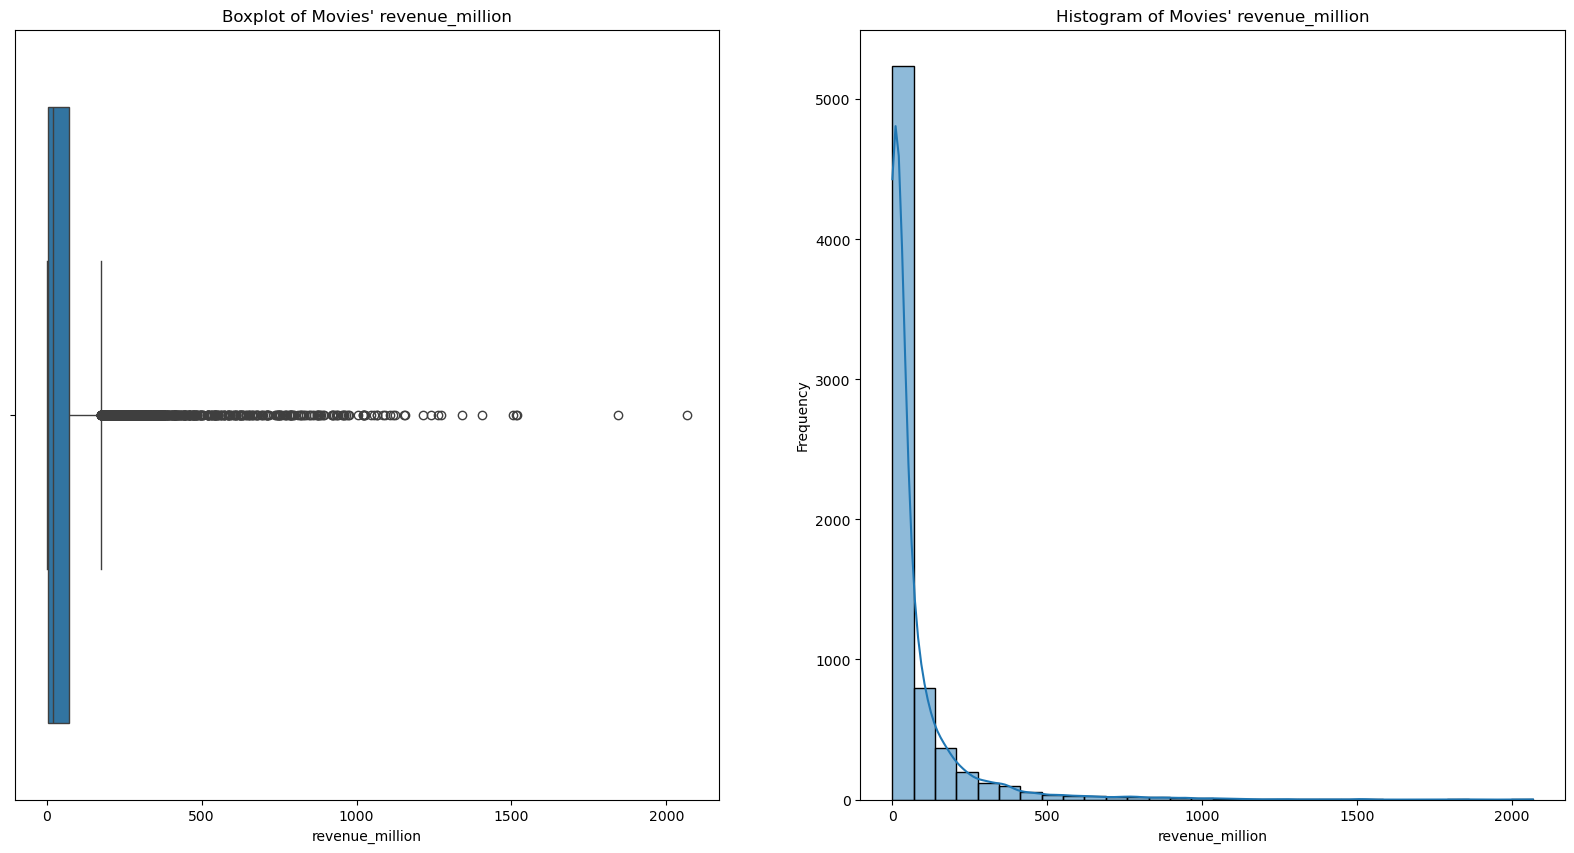

In [37]:
plot_box_hist(exploration, 'revenue_million')

We can see again that it is a lot right-skewed but will try again fixing using log transformation.

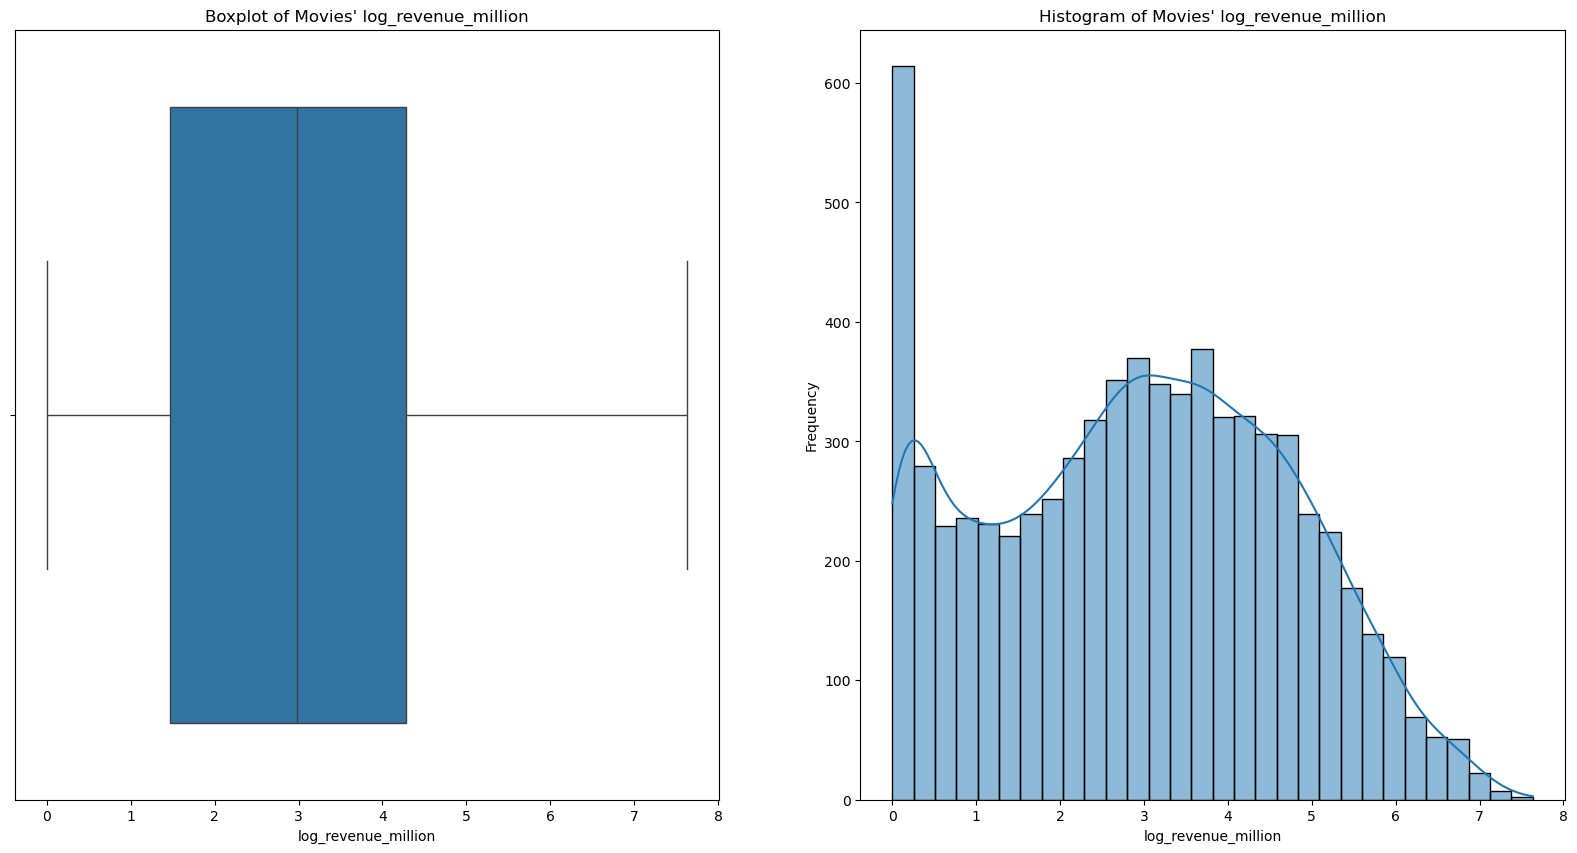

In [38]:
# Log-transform the revenue_million column
exploration['log_revenue_million'] = np.log1p(exploration['revenue_million'])

plot_box_hist(exploration, 'log_revenue_million')

Although the log transformation we did not had that much success as for the "budget_million" column, but the high amount near the 0 could be normal because there are a lot movies which are not successful. That is why we would leave it like this.

#### 4. Release date ####
We have to identify this record with a missing date and see if we can check it on the internet.

In [39]:
exploration[exploration['release_date'].isna()]

,budget_million,original_language,release_date,revenue_million,runtime,title,genres_list,production_companies_list,production_countries_list,spoken_languages_list,keywords_list,cast_list,director,log_budget_million,log_revenue_million
94214,NaN,en,NaT,0.00001,90,"Jails, Hospitals & Hip-Hop",[Drama],[],[],[],[],[],[],NaN,0.00001


The row seems to not contain that much information so we will drop it.

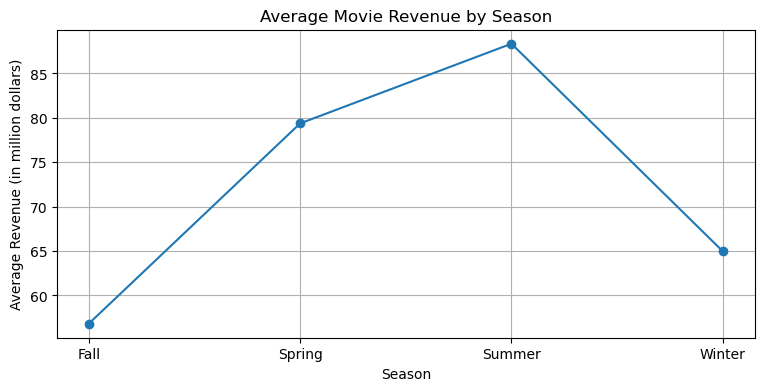

Correlation between seasons and revenue:
season_Fall     -0.064957
season_Spring    0.028659
season_Summer    0.065292
season_Winter   -0.025775
Name: revenue_million, dtype: float64


In [40]:
exploration = exploration.dropna(subset=['release_date'])

# Define a function to get the season from a date
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


exploration['release_season'] = exploration['release_date'].apply(get_season)

revenue_by_season = exploration.groupby('release_season')['revenue_million'].mean().reset_index()

revenue_by_season.columns = ['Season', 'Average Revenue (in million dollars)']

# Plot the total revenue by season
plt.figure(figsize=(9, 4))
plt.plot(revenue_by_season['Season'], revenue_by_season['Average Revenue (in million dollars)'], marker='o')
plt.title('Average Movie Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue (in million dollars)')
plt.grid(True)
plt.show()

# Correlation between season and revenue
season_revenue_corr = exploration[['release_season', 'revenue_million']].copy()
season_dummies = pd.get_dummies(exploration['release_season'], prefix='season')

# Combine with revenue and calculate correlations
season_revenue_corr = pd.concat([season_dummies, exploration['revenue_million']], axis=1)
correlations = season_revenue_corr.corr()['revenue_million'].drop('revenue_million')

print("Correlation between seasons and revenue:")
print(correlations)

Seems like the season in which a movie is produce does not matter that much as the biggest difference is 35 million. When we consider that we have standart deviation of 149 million that is prety small for seasons to have correlation with revenue.

#### 5. Genres ####

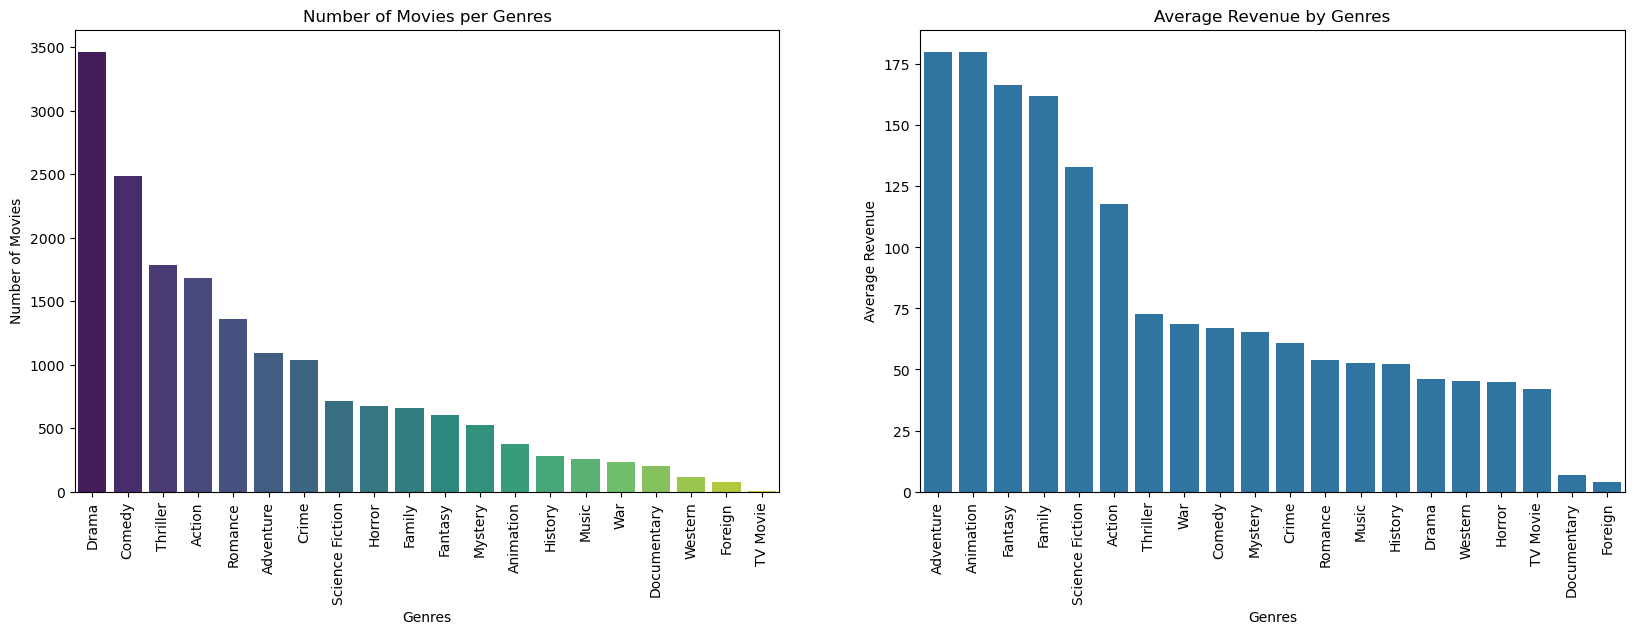

Correlation between Genres Frequency and Revenue: -0.17788248859769618


In [41]:
def single_correlation(data, column, data_counts=None):
    if data_counts is None:
        data_ex = data[column].explode()
        data_counts = data_ex.value_counts()
    
    column_name = column.replace('_list', '').replace('_', ' ').capitalize()
    
    data[f'{column}_frequency'] = data[column].apply(lambda companies: sum(data_counts.get(company, 0) for company in companies) / len(companies) if companies else 0)
    category_revenue_corr = data[f'{column}_frequency'].corr(data['revenue_million'])
    
    print(f"Correlation between {column_name} Frequency and Revenue: {category_revenue_corr}")

def extract_from_list(data, column, records=None, print_frequency=False):
    data_ex = data[column].explode()
    data_counts = data_ex.value_counts()
    data_unique = data_ex.unique()

    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    sns.barplot(x=data_counts.index[:records], y=data_counts.values[:records], palette='viridis', hue=data_counts.index[:records], ax=ax[0])

    column_name = data_ex.name.replace('_list', '').replace('_', ' ').capitalize()

    ax[0].set_title(f'Number of Movies per {column_name}')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Number of Movies')
    ax[0].tick_params(axis='x', rotation=90)

    data_revenue = data.explode(column).groupby(column)['revenue_million'].mean().reset_index()
    data_revenue = data_revenue.rename(columns={'revenue_million': 'average_revenue'}).sort_values('average_revenue', ascending=False)

    column_name = column.replace('_list', '').replace('_', ' ').capitalize()

    sns.barplot(data=data_revenue[:records], x=column, y='average_revenue', ax=ax[1])
    ax[1].set_title(f'Average Revenue by {column_name}')
    ax[1].set_xlabel(column_name)
    ax[1].set_ylabel('Average Revenue')
    ax[1].tick_params(axis='x', rotation=90)

    plt.show()

    single_correlation(data, column, data_counts)

    return (data_ex, data_counts, data_unique, data_revenue, data[f'{column}_frequency']) if print_frequency else data_ex, data_counts, data_unique, data_revenue

genres, genres_counts, genres_unique, genre_revenue = extract_from_list(exploration, 'genres_list')

Drama and Comedy have the most movies, but their average revenue is lower, which might mean there are too many of them. On the other hand, genres like Adventure, Animation, and Fantasy make the most money even though fewer movies are made. Focusing on these profitable genres, as well as underrepresented ones like Family and Science Fiction, could help improve overall revenue. It seems like the frequency of a given genre does have some negative correlate with the revenue of a movie.

Average Revenue for Single-Genre Movies: 38.49834628111587
Average Revenue for Multi-Genre Movies: 80.24647112337777


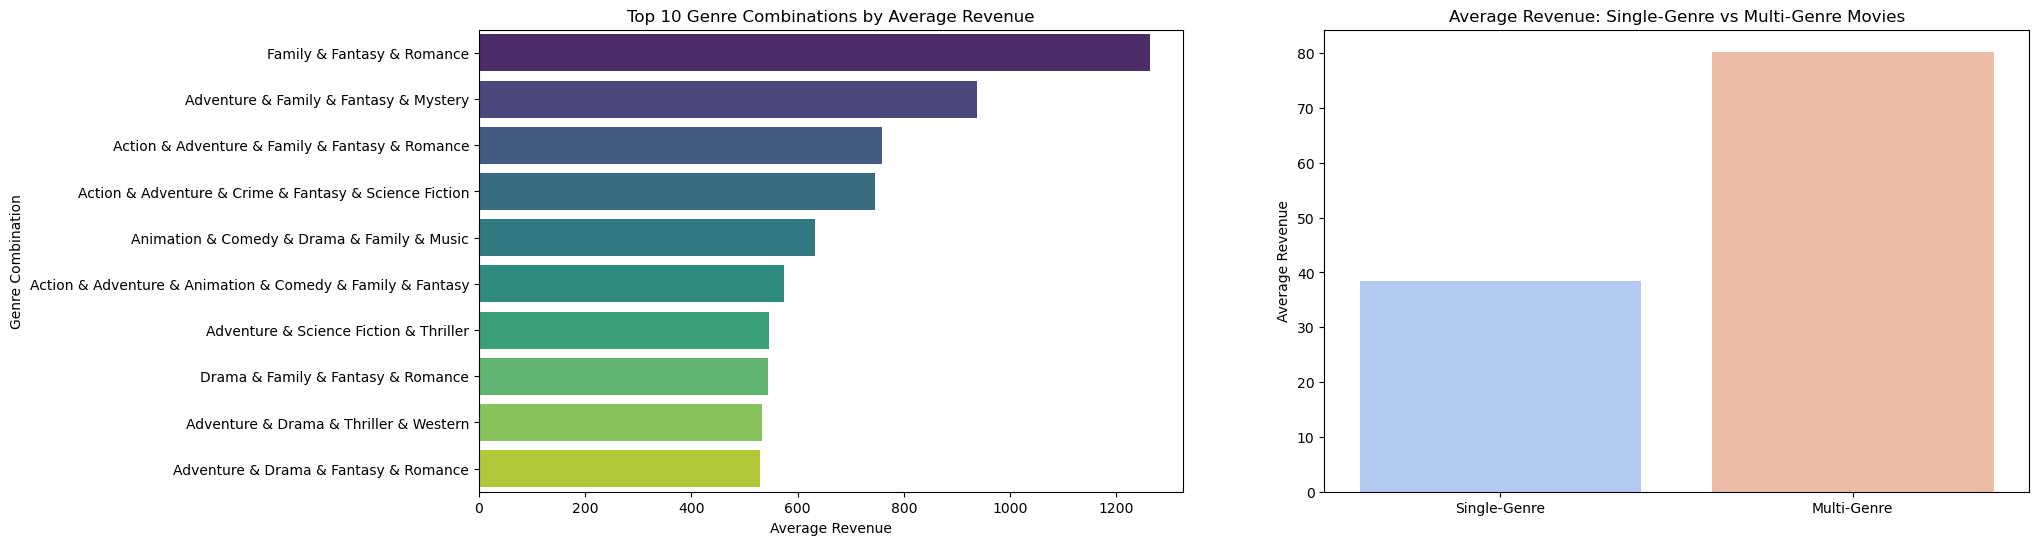

In [42]:
exploration['genres'] = exploration['genres_list']

# Create a column for sorted genre combinations
exploration['genre_combination'] = exploration['genres'].apply(lambda x: ' & '.join(sorted(x)))

# Average revenue for each genre combination
genre_combination_revenue = exploration.groupby('genre_combination')['revenue_million'].mean().reset_index()
genre_combination_revenue = genre_combination_revenue.sort_values(by='revenue_million', ascending=False)

# Compare single-genre vs multi-genre movies
exploration['genre_count'] = exploration['genres'].apply(len)

# Average revenue for single-genre and multi-genre movies
single_genre_avg = exploration[exploration['genre_count'] == 1]['revenue_million'].mean()
multi_genre_avg = exploration[exploration['genre_count'] > 1]['revenue_million'].mean()

print(f"Average Revenue for Single-Genre Movies: {single_genre_avg}")
print(f"Average Revenue for Multi-Genre Movies: {multi_genre_avg}")

# Making some plots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

top_combinations = genre_combination_revenue.head(10) 
sns.barplot(x='revenue_million', y='genre_combination', data=top_combinations, palette='viridis', hue='genre_combination', ax=ax[0])
ax[0].set_title('Top 10 Genre Combinations by Average Revenue')
ax[0].set_xlabel('Average Revenue')
ax[0].set_ylabel('Genre Combination')

sns.barplot(x=['Single-Genre', 'Multi-Genre'], y=[single_genre_avg, multi_genre_avg], palette='coolwarm', hue=['Single-Genre', 'Multi-Genre'], ax=ax[1])
ax[1].set_title('Average Revenue: Single-Genre vs Multi-Genre Movies')
ax[1].set_ylabel('Average Revenue')
plt.show()

In [43]:
correlation = exploration['genre_count'].corr(exploration['revenue_million'])
print(f"Correlation between Genre Count and Revenue: {correlation}")

Correlation between Genre Count and Revenue: 0.182449345366369


The results show that multi-genre movies have significantly higher average revenue (80 million) compared to single-genre movies (39 million). Additionally, the correlation between genre count and revenue is 0.18, indicating a weak positive correlation. This suggests that combining genres can lead to higher revenues, but the relationship is not very strong.

#### 6. Production companies ####

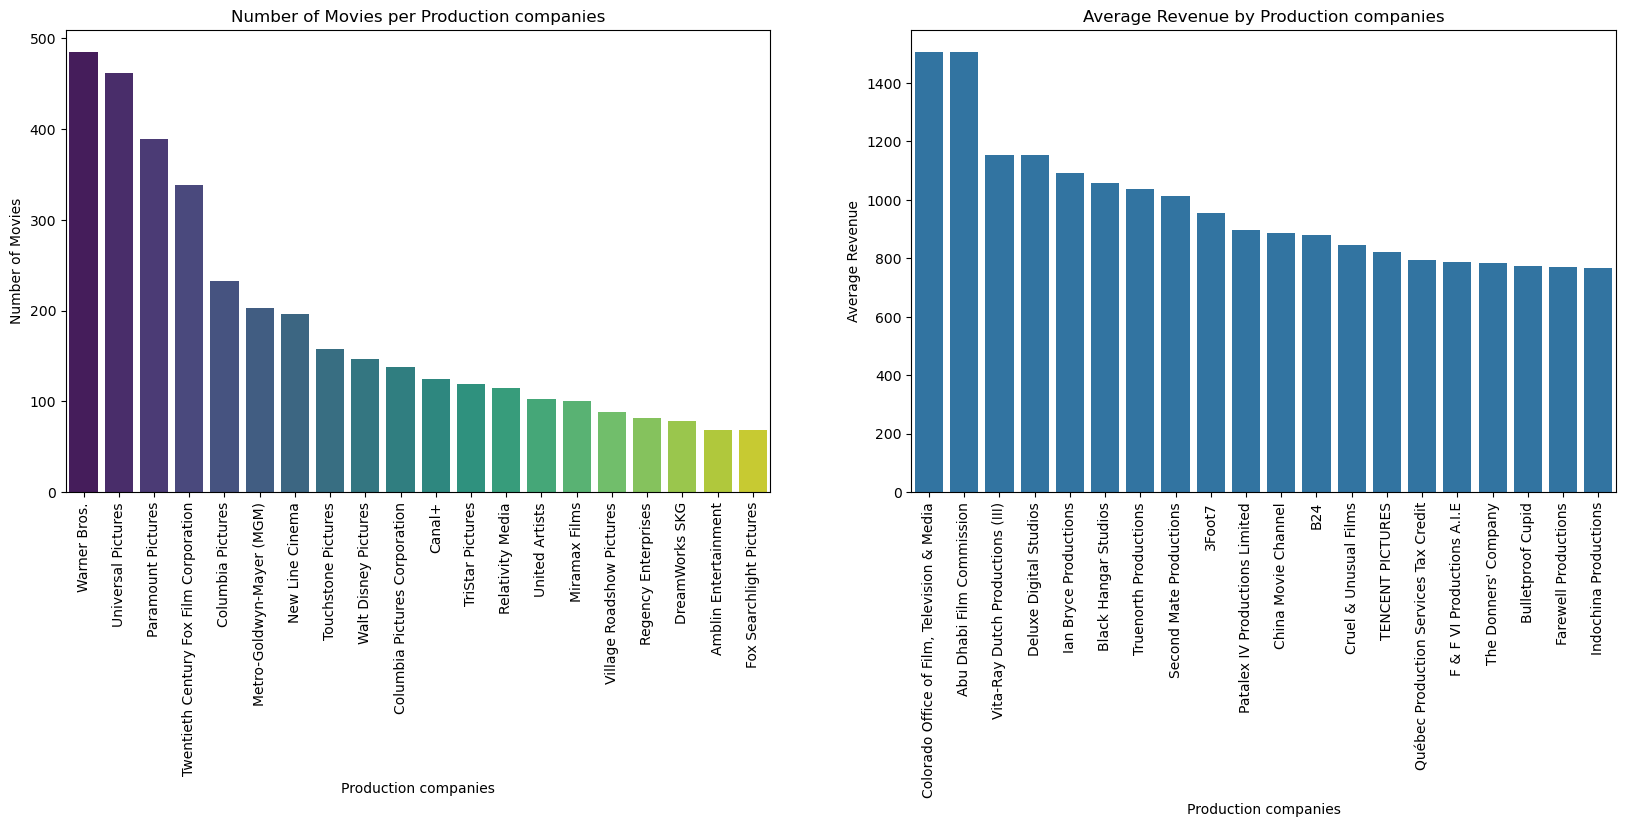

Correlation between Production companies Frequency and Revenue: 0.11321920589318993


In [44]:
prod_companies, prod_companies_counts, prod_companies_unique, prod_companies_revenue = extract_from_list(exploration, 'production_companies_list', 20)

Warner Bros. and Universal Pictures produce the most movies, while other companies like Paramount and Columbia Pictures follow closely. However, companies like Abu Dhabi Film Commission and Vita-Ray Productions generate the highest average revenue, even with fewer movies, showing that smaller studios can still produce highly profitable films. This suggests that production volume doesn’t always equal profitability. The correlation seems to be again very week for predicting revenue.

In [45]:
def combination_correlation(data, column):


    # Create a column for sorted combinations
    data['combinations'] = data[column].apply(lambda x: ' & '.join(sorted(x)))

    column_name = column.replace('_list', '').replace('_', ' ').capitalize()

    # Average revenue for each genre combination
    combination_revenue = data.groupby('combinations')['revenue_million'].mean().reset_index()
    combination_revenue = combination_revenue.sort_values(by='revenue_million', ascending=False)

    # Compare single-genre vs multi-genre movies
    data[f'{column}_count'] = data[column].apply(len)

    correlation = data[f'{column}_count'].corr(exploration['revenue_million'])
    print(f"Correlation between Multi-{column_name} Count and Revenue: {correlation}")

combination_correlation(exploration, 'production_companies_list')

Correlation between Multi-Production companies Count and Revenue: 0.12147679662735121


#### 7. Production countries ####

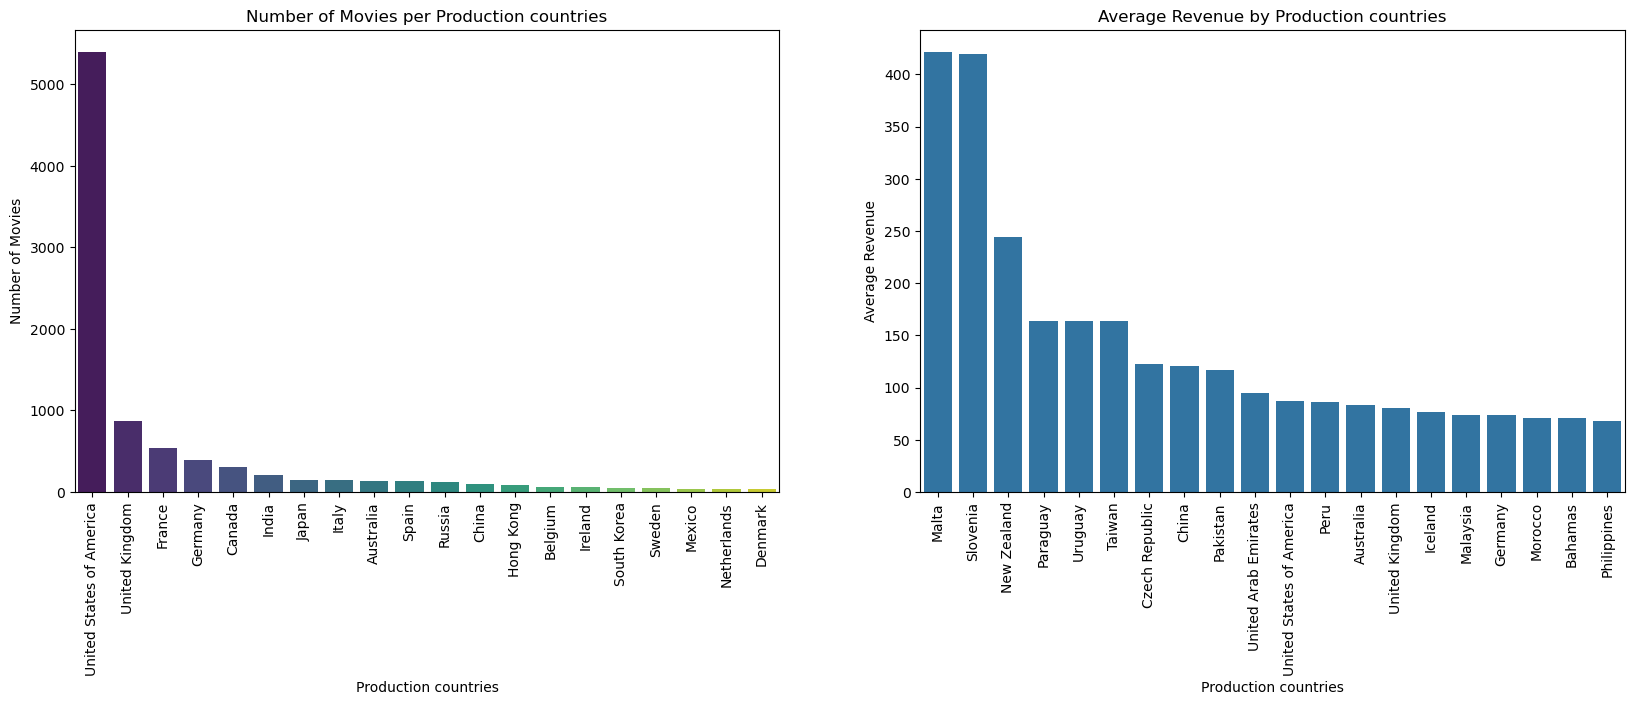

Correlation between Production countries Frequency and Revenue: 0.14626399085775446


In [46]:
prod_country, prod_country_counts, prod_country_unique, prod_companies_revenue = extract_from_list(exploration, 'production_countries_list', 20)


The United States produces the highest number of movies by a large margin, followed by the United Kingdom and France. However, countries like Malta and Slovenia have the highest average revenue, despite producing far fewer movies, indicating that smaller production countries can still achieve significant revenue success. The weak correlation of 0.14 suggests that the frequency of movie production in a country has little to no relationship with average revenue.

In [47]:
combination_correlation(exploration, 'production_countries_list')

Correlation between Multi-Production countries Count and Revenue: 0.030631849055952558


#### 8. Keywords ####

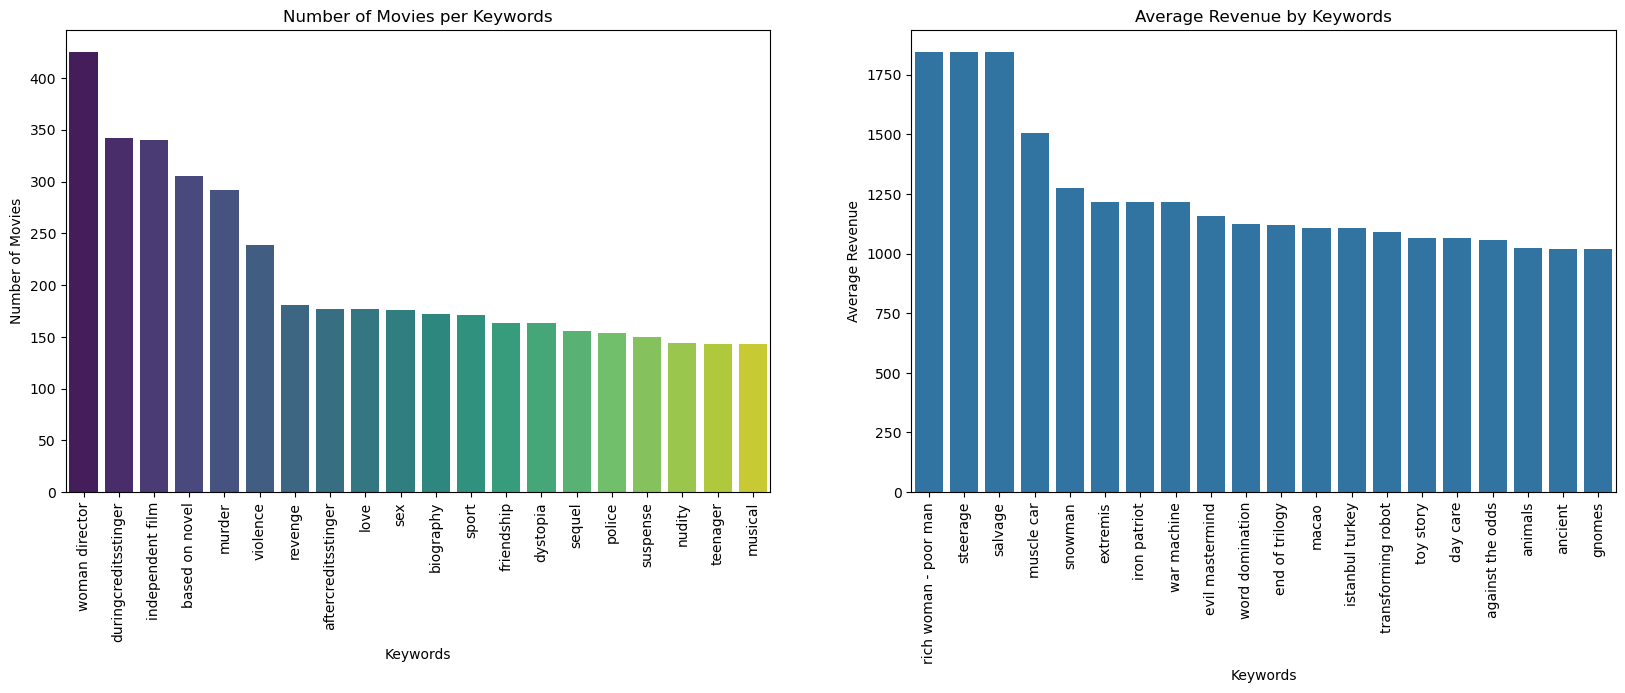

Correlation between Keywords Frequency and Revenue: -0.03541509635632848


In [48]:
keywords, keywords_counts, keywords_unique, keywords_revenue = extract_from_list(exploration, 'keywords_list', 20)

From the graphs, we can see that "woman director" and "duringcreditsstinger" are the most frequent keywords, appearing in the highest number of movies. However, frequent keywords like these do not necessarily relate to higher revenue.

On the right, keywords like "anti war", "rich woman - poor man", and "steerage" are associated with the highest average revenues, showing again that less common but specific keywords can generate significant financial success.

Interestingly, the overall correlation between keyword frequency and revenue is -0.04, which suggests a very weak and slightly negative relationship. This means that just because a keyword appears often doesn’t mean it contributes to higher movie revenue.

In [49]:
combination_correlation(exploration, 'keywords_list')

Correlation between Multi-Keywords Count and Revenue: 0.21730506425608662


#### 9. Cast ####

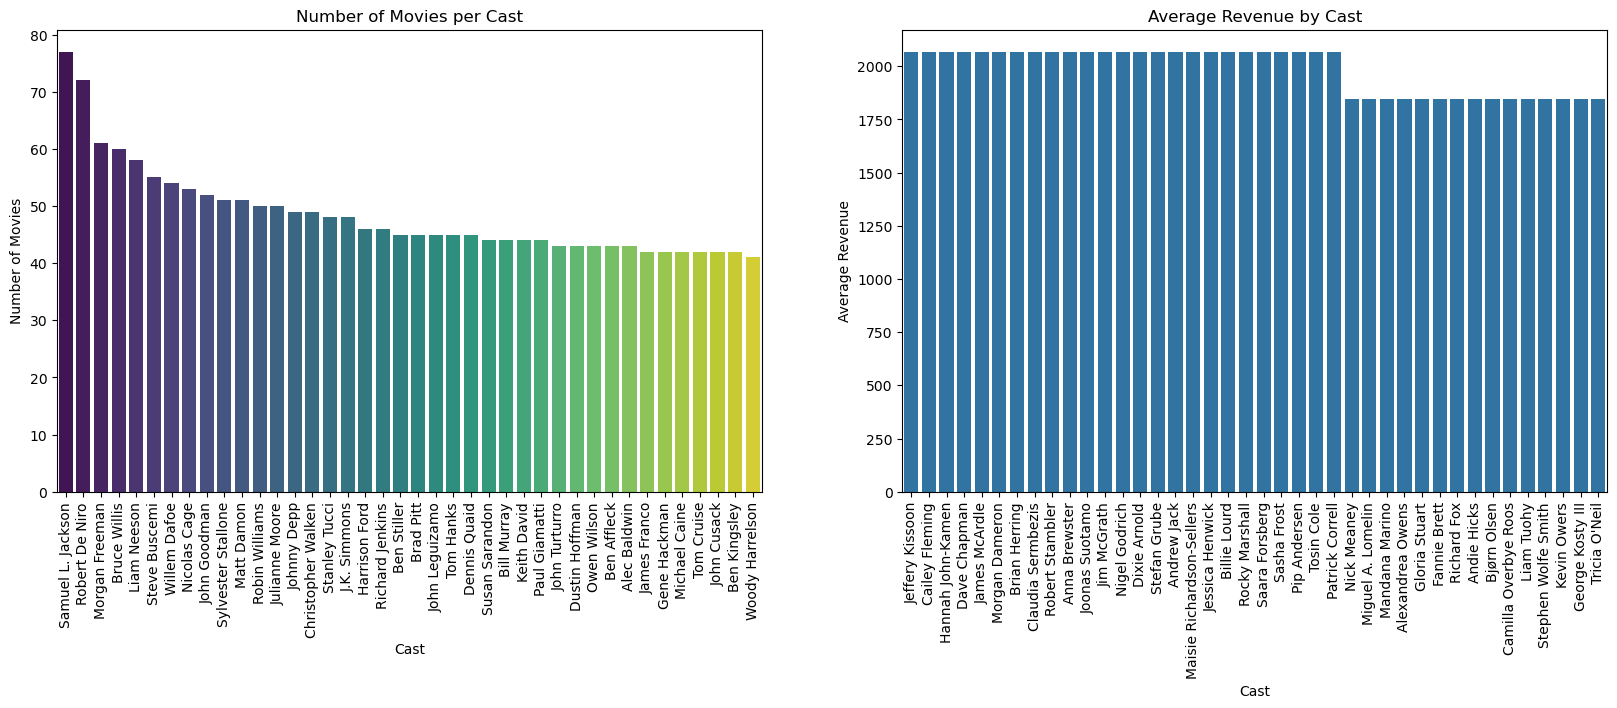

Correlation between Cast Frequency and Revenue: 0.12414458188576995


In [50]:
cast, cast_counts, cast_unique, cast_revenue = extract_from_list(exploration, 'cast_list', 40)

Actors who appear in a high number of movies, like Samuel L. Jackson and Robert De Niro, do not necessarily have higher average revenue for their movies. While the charts highlight some actors, there are many others not shown here, making it difficult to evaluate the performance of every actor individually. The correlation here is again around 12 which is low.

In [51]:
combination_correlation(exploration, 'cast_list')

Correlation between Multi-Cast Count and Revenue: 0.3689686165387191


#### 10. Director ####

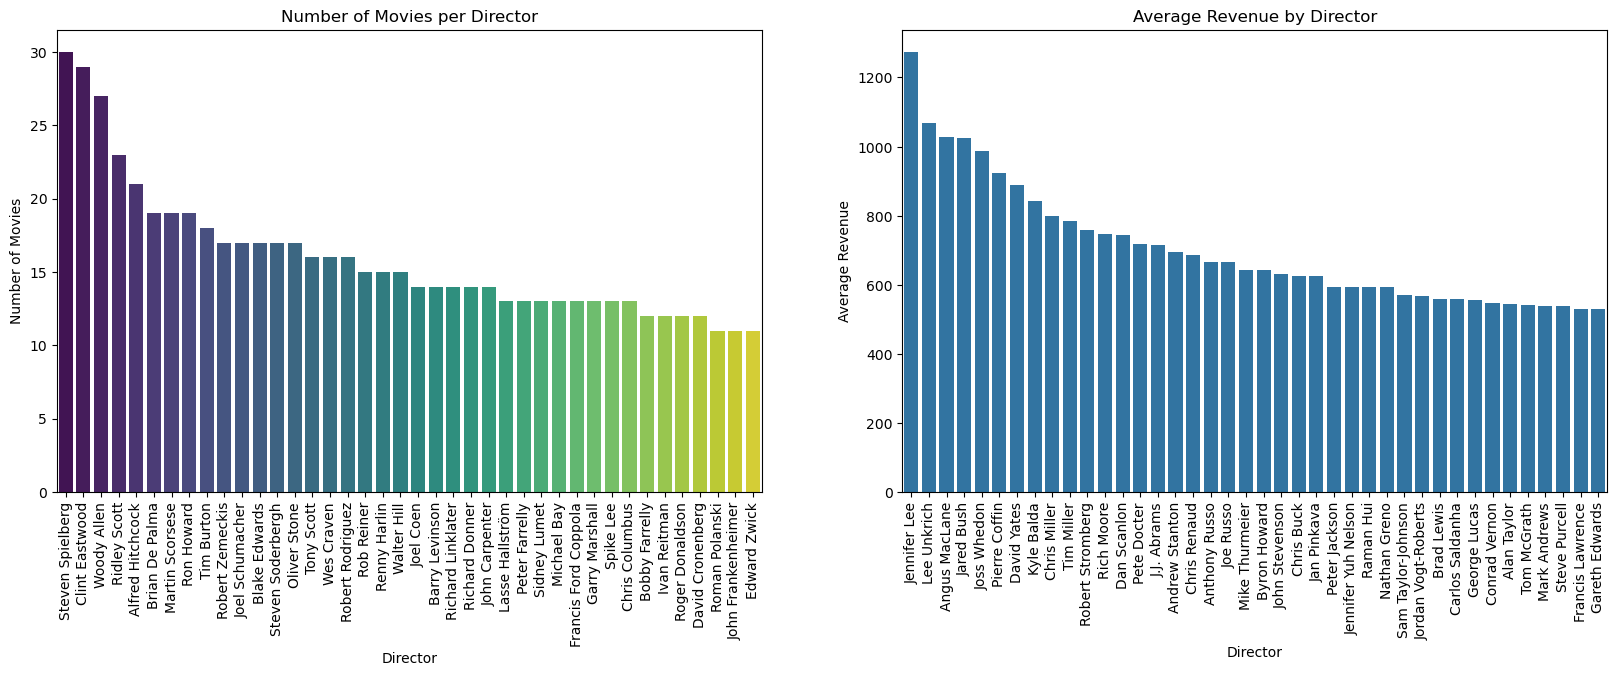

Correlation between Director Frequency and Revenue: 0.21126761466128155


In [52]:
director, director_counts, director_unique, director_revenue = extract_from_list(exploration, 'director', 40)

In [53]:
combination_correlation(exploration, 'director')

Correlation between Multi-Director Count and Revenue: 0.017499211729959396


6. Final Thoughts:

In [54]:
for column in ['genres_list', 'production_companies_list', 'production_countries_list', 'keywords_list', 'cast_list', 'director', 'spoken_languages_list']:
    single_correlation(exploration, column)
    combination_correlation(exploration, column)
    print('')

Correlation between Genres Frequency and Revenue: -0.17788248859769618
Correlation between Multi-Genres Count and Revenue: 0.182449345366369

Correlation between Production companies Frequency and Revenue: 0.11321920589318993
Correlation between Multi-Production companies Count and Revenue: 0.12147679662735121

Correlation between Production countries Frequency and Revenue: 0.14626399085775446
Correlation between Multi-Production countries Count and Revenue: 0.030631849055952558

Correlation between Keywords Frequency and Revenue: -0.03541509635632848
Correlation between Multi-Keywords Count and Revenue: 0.21730506425608662

Correlation between Cast Frequency and Revenue: 0.12414458188576995
Correlation between Multi-Cast Count and Revenue: 0.3689686165387191

Correlation between Director Frequency and Revenue: 0.21126761466128155
Correlation between Multi-Director Count and Revenue: 0.017499211729959396

Correlation between Spoken languages Frequency and Revenue: 0.07867704780674033
C

From the numerical columns we decided to use the budget (highly correlated with the revenue) and runtime.

We can see that for the columns containing lists like "cast_list" the correlation becomes much higher where for others like 'director' it drops drastically. From this we decided that we will use the combination of columns "genres_list", "keywords_list" and "cast_list" and will use the as single the "director" column.

#### 4. Prepare the data ####

First we will start with dropping all not usefull columns and cut movies which have revenue and budget less than 0.2 million. Then we will separate the data into train and test to prevent data leakage as here we will start our pipeline where imputing and final data polishing will happen.

In [55]:
processed_data = data.copy()

# Drop the columns that are not needed
processed_data = processed_data.drop(['original_language', 'release_date', 'title', 'production_companies_list', 'production_countries_list', 'spoken_languages_list'], axis=1)

# Cutting the budget and revenue bellow 0.2
processed_data['budget_million'] = processed_data['budget_million'].replace(0, np.nan)
processed_data_nan = processed_data[processed_data['budget_million'].isna()]
processed_data = processed_data[(processed_data['budget_million'] > 0.2) & (processed_data['revenue_million'] > 0.2)]
processed_data_nan = processed_data_nan[processed_data_nan['revenue_million'] > 0.2]

processed_data = pd.concat([processed_data, processed_data_nan])

Okay so now we cut the data low records and dropped the columns we decided we won't use from the data exploration step. Now we will split the data and build a pipeline.

In [56]:
train, test = train_test_split(processed_data, test_size=0.2, random_state=42)
feature_summary(train)

,Data Type,Missing Values (%),Unique Values
budget_million,float64,23.611376,524
revenue_million,float64,0.000000,4897
runtime,int32,0.000000,155
genres_list,object,0.000000,1225
keywords_list,object,0.000000,4724
cast_list,object,0.000000,5228
director,object,0.000000,2592


In [57]:
for column in train.select_dtypes(include='number').columns:
    check_0_values(train, column)
    print('')

Total number of rows: 5239
Budget_million which are 0: 0
Percentage of budget_million which are 0: 0.00%

Total number of rows: 5239
Revenue_million which are 0: 0
Percentage of revenue_million which are 0: 0.00%

Total number of rows: 5239
Runtime which are 0: 14
Percentage of runtime which are 0: 0.27%



We have some NaN values, some 0 values but we will clear all in the pipeline with custom class to handle this.

Okay so the steps for our preprocess pipeline are as follows:

1. To make every 0 value into NaN.
2. To impute with SimpelImputer "runtime" column.
3. To impute with KNNImputer "budget_million" column.
4. To scale "runtime" and "budget_million" using MinMaxScaler.
5. To apply log transformation to the "budget_million" column and see if it works.
6. To transform the list columns as they should be for the training.

**Note:** We tried log transformation but it influence the results negatively. And we decided to use only MinMaxScaler (only positive data).

In [58]:
X_train = train.drop('revenue_million', axis=1)
y_train = train['revenue_million']
X_test = test.drop('revenue_million', axis=1)
y_test = test['revenue_million']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Defining class to transform 0 and -1 values to NaN
class ZeroToNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Check if the input is a DataFrame or ndarray
        if isinstance(X, pd.DataFrame):
            X = X.copy()
            if self.columns:
                for col in self.columns:
                    if col in X.columns:
                        X[col] = X[col].replace(0, np.nan)
                        X[col] = X[col].replace(-1, np.nan)
            else:
                X = X.replace(0, np.nan)
                X = X.replace(-1, np.nan)

        elif isinstance(X, np.ndarray):
            X = np.where(X == 0, np.nan, X)
            X = np.where(X == -1, np.nan, X)

        else:
            raise ValueError("Input must be a Pandas DataFrame or a NumPy ndarray.")

        return X

# Custom Transformer to convert NumPy array to DataFrame 
class DataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformer, columns=None):
        self.transformer = transformer
        self.columns = columns

    def fit(self, X, y=None):
        self.transformer.fit(X, y)
        return self

    def transform(self, X):
        transformed = self.transformer.transform(X)

        return pd.DataFrame(transformed, index=X.index, columns=self.columns)

# Custom Transformer to impute budget values using KNNImputer   
class BudgetImputerWithAdditionalColumns(BaseEstimator, TransformerMixin):
    def __init__(self, additional_data, knn_neighbors=5):
        self.additional_data = additional_data
        self.knn_neighbors = knn_neighbors
        self.knn_imputer = KNNImputer(n_neighbors=knn_neighbors)

    def fit(self, X, y=None):
        self.data_for_imputation = self._prepare_data(X)
        self.knn_imputer.fit(self.data_for_imputation)
        return self

    def transform(self, X):
        data_for_imputation = self._prepare_data(X)
        imputed_data = self.knn_imputer.transform(data_for_imputation)
        
        X_copy = X.copy()
        X_copy['budget_million'] = imputed_data[:, 0]
        # X_copy['budget_million'] = np.log1p(X_copy['budget_million']) # Log-transform the budget values (Not helping)
        return X_copy

    def _prepare_data(self, X):
        additional_cols = self.additional_data.loc[X.index]
        data = pd.concat([
            X[['budget_million', 'runtime']],
            additional_cols[['popularity', 'vote_count']]
        ], axis=1)
        return data
    
# Custom Transformer for length of records
class LengthColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scalers = {}

    def fit(self, X, y=None):
        X_copy = X.copy()

        for col in self.columns:
            # Generate length column
            X_copy[f'{col}_length'] = X_copy[col].apply(lambda x: len(x) if isinstance(x, list) else 0)

            # Fit scaler
            scaler = MinMaxScaler()
            scaler.fit(X_copy[[f'{col}_length']])
            self.scalers[col] = scaler

        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            # Generate string combinations
            X_copy[f'{col}_combinations'] = X_copy[col].apply(
                lambda x: ' & '.join(sorted(x)) if isinstance(x, list) and len(x) > 0 else None
            )

            # Generate and scale length column
            X_copy[f'{col}_length'] = X_copy[col].apply(lambda x: len(x) if isinstance(x, list) else 0)
            X_copy[[f'{col}_length']] = self.scalers[col].transform(X_copy[[f'{col}_length']])

        # Drop original columns
        X_copy.drop(columns=self.columns, inplace=True)
        return X_copy


# Custom Transformer to calculate frequencies for each record item
class FrequencyColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.frequency_dict = {}
        self.scalers = {}

    def fit(self, X, y=None):
        X_copy = X.copy()

        for col in self.columns:
            # Calculate frequency dictionary
            all_items = X_copy[col].explode()
            self.frequency_dict[col] = all_items.value_counts().to_dict()

            # Generate frequency column
            X_copy[f'{col}_frequency'] = X_copy[col].apply(
                lambda lst: sum(self.frequency_dict[col].get(item, 0) for item in lst)
                if isinstance(lst, list) else 0
            )

            # Fit scaler
            scaler = MinMaxScaler()
            scaler.fit(X_copy[[f'{col}_frequency']])
            self.scalers[col] = scaler

        return self

    def transform(self, X):
        X_copy = X.copy()

        for col in self.columns:
            # Generate string combinations
            X_copy[f'{col}_combinations'] = X_copy[col].apply(
                lambda x: ' & '.join(sorted(x)) if isinstance(x, list) and len(x) > 0 else None
            )

            # Generate frequency column
            X_copy[f'{col}_frequency'] = X_copy[col].apply(
                lambda lst: sum(self.frequency_dict[col].get(item, 0) for item in lst)
                if isinstance(lst, list) else 0
            )

            # Scale frequency column
            X_copy[[f'{col}_frequency']] = self.scalers[col].transform(X_copy[[f'{col}_frequency']])

        # Drop original columns
        X_copy.drop(columns=self.columns, inplace=True)
        return X_copy
        

# Define Columns
numeric_features = ['runtime', 'budget_million']
combination_features = ['genres_list', 'keywords_list']
single_features = ['cast_list', 'director']



budget_runtime_pipeline = Pipeline([
    ('zero_to_nan', ZeroToNaNTransformer(columns=['runtime', 'budget_million'])),  
    ('runtime_imputer', DataFrameTransformer(SimpleImputer(strategy='median'), columns=['runtime', 'budget_million'])),
    ('budget_imputer', BudgetImputerWithAdditionalColumns(additional_data=merged_movies_org)),
    ('scaler', MinMaxScaler())
])

# Define Preprocessing Steps
preprocessor = ColumnTransformer([
    ('numeric_feature_pipeline', budget_runtime_pipeline, ['budget_million', 'runtime']),
    ('combination_transform', LengthColumnTransformer(columns=combination_features), combination_features),
    ('frequency_transform', FrequencyColumnTransformer(columns=single_features), single_features),
], remainder='passthrough')

# Full Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Transform the training data
X_train_imputed = pipeline.transform(X_train)

X_val_imputed = pipeline.transform(X_val)

X_test_imputed = pipeline.transform(X_test)

In [59]:
for i in range(len(X_train_imputed[0])):
    print(f'{i}. {X_train_imputed[0][i]}')

0. 0.05210774375312672
1. 0.3932203389830508
2. Adventure & Thriller & War
3. 0.42857142857142855
4. 3d & chinese communists & civil war
5. 0.030927835051546393
6. Chen Xiao & Gao Hu & Han Geng & Lin Gengxin & Nan Yu & Tong Liya & Tony Leung Ka-Fai & Tse Miu & Zhang Hanyu
7. 0.02545968882602546
8. Tsui Hark
9. 0.11290322580645161


In [60]:
column_names = (
        ['budget_million_scaled', 'runtime_scaled', 'genres_combinations',
        'genres_frequency', 'keywords_combinations', 'keywords_frequency', 
        'cast_combinations', 'cast_frequency', 'director_combinations', 'director_frequency']
    )

def after_pipeline(array, column_names, index_data, y=None):
    
    def get_combination_budget(data, column):
        return data.groupby(column)['budget_million_scaled'].median().to_dict()

    if y is not None:
        # y = np.log10(y) # Log-transform the target (Not helping)
        y_scaled = MinMaxScaler().fit_transform(y.values.reshape(-1, 1)).flatten()
        y_scaled = pd.Series(y_scaled, name='revenue_million', index=y.index)

    df = pd.DataFrame(array, columns=column_names, index=index_data.index)

    for col in ['genres_combinations']:
        df[col] = df[col].map(get_combination_budget(df, col))

    df = df.drop(['keywords_combinations', 'cast_combinations', 'director_combinations'], axis=1)

    imputer = SimpleImputer(strategy='median')
    df_imputed = imputer.fit_transform(df)
    df = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)

    if y is None:
        return df
    else:
        return df, y_scaled


X_train, y_train = after_pipeline(X_train_imputed, column_names, X_train, y_train)


X_train.head(2)

,budget_million_scaled,runtime_scaled,genres_combinations,genres_frequency,keywords_frequency,cast_frequency,director_frequency
294992,0.052108,0.393220,0.052108,0.428571,0.030928,0.025460,0.112903
10328,0.052108,0.311864,0.052108,0.428571,0.206186,0.175389,0.161290


We decided to use the MinMaxScaler as we are dealing with only positive values. We will see if our observations from before are correct by plotting a correlation matrix. We added a few more feature after training and testing models. We decided because the "genres_combinations" column represents a small number of columns to see what is the average budget of each genre combination.

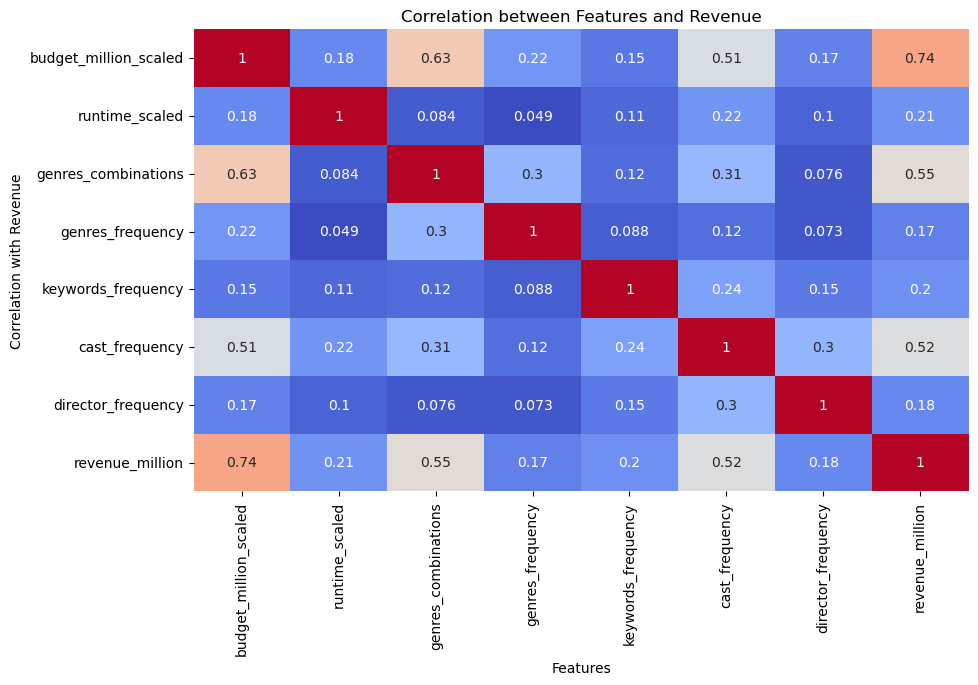

In [61]:
corr = pd.concat([X_train, y_train], axis=1).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Features and Revenue')
plt.xlabel('Features')
plt.ylabel('Correlation with Revenue')
plt.show()

After target processing by log transformation and scaling the budget correlation is reduced but the other have increase.

In [62]:
# 'genres_frequency', 'cast_frequency', 'keywords_frequency', 'director_frequency', 'genres_combinations', 'keywords_combinations', 'cast_combinations', 'director_combinations'
exclude = []

X_train_test = X_train.drop(exclude, axis=1)

for col in X_train_test.columns:
    if any(isinstance(i, list) for i in X_train_test[col]):
        print(f"Column '{col}' contains lists or sequences.")

models_pipeline = {
    'Linear Regression': Pipeline([
        ('model', LinearRegression())
    ]),
    'SVR': Pipeline([
        ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))
    ]),
    'Decision Tree': Pipeline([
        ('model', DecisionTreeRegressor())
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestRegressor(n_estimators=50, random_state=42))
    ]),
    'Gradient Boosted Trees': Pipeline([
        ('model', GradientBoostingRegressor(n_estimators=50, random_state=42))
    ])
}

# Train and Evaluate All Models
for name, model_pipeline in models_pipeline.items():
    scores = cross_val_score(model_pipeline, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    rmse_scores = cross_val_score(model_pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
    print(f"""{name}:
          R2: {scores.mean():.4f} / RMSE: {-rmse_scores.mean():.4f}""")

Linear Regression:
          R2: 0.5870 / RMSE: 0.0472
SVR:
          R2: -0.0359 / RMSE: 0.0745
Decision Tree:
          R2: 0.3157 / RMSE: 0.0606
Random Forest:
          R2: 0.6228 / RMSE: 0.0450
Gradient Boosted Trees:
          R2: 0.6330 / RMSE: 0.0444


In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

print("Tuning Random Forest...")
grid_search.fit(X_train_test, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_train_pred = best_model.predict(X_train_test)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

print(f"Training R2: {train_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

Tuning Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
X_test, y_test = after_pipeline(X_test_imputed, column_names, X_test, y_test)
X_test = X_test.drop(exclude, axis=1)

y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Test R2: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

The Random Forest is performing better than the base model when we compare R2 and RMSE. Which is good. Gradient Boosted Tree does not yell much better results compared to the longer training process.

In [ ]:
X_val, y_val = after_pipeline(X_val_imputed, column_names, X_val, y_val)
X_val = X_val.drop(exclude, axis=1)

In [ ]:
model = Sequential([
    Input(shape=(X_train_test.shape[1],)),          # Input layer
    Dense(64, activation='leaky_relu'),             # Hidden layer with 64 neurons
    Dense(64, activation='leaky_relu'),             # Hidden layer with 32 neurons
    Dense(32, activation='leaky_relu'),             # Hidden layer with 32 neurons
    Dense(1, activation='linear')                   # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError(), RSquare()])

# Train the model
history = model.fit(X_train_test, y_train, validation_data=(X_val, y_val), 
                    epochs=50, batch_size=64, verbose=1)

# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=1)
print(f"""
Test Loss: {results[0]:.4f}
Test RMSE: {results[1]:.4f}
Test R2:   {results[2]:.4f}
""")